In [ ]:
%matplotlib inline

import os

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib.pyplot import imshow
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.model_selection import KFold
import seaborn as sns


In [ ]:

# Setup data paths and categories
root = 'D:/Milon2/81_256/Central'

categories = [x[0] for x in os.walk(root) if x[0]][1:]

print(categories)

['D:/Milon2/81_256/Central\\Healthy_Control', 'D:/Milon2/81_256/Central\\Schizophrenia']


In [ ]:

# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x


In [ ]:
# Load data
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(category) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

In [ ]:
# count the number of classes
num_classes = len(categories)

In [ ]:

# Generate K-fold splits
num_folds = 10
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state = 42)
fold_no = 1
for train, test in kfold.split(data):
  #print("TRAIN:", train, "TEST:", test)
  if os.path.exists(f"D:/Milon2/81_256/result/cent/train/train{fold_no}.csv") == False:
    np.savetxt(f"D:/Milon2/81_256/result/cent/train/train{fold_no}.csv", train, delimiter=",", fmt='%s')
    np.savetxt(f"D:/Milon2/81_256/result/cent/test/test{fold_no}.csv", test, delimiter=",", fmt='%s')
  else:
    print("exists")
  fold_no = fold_no + 1

In [ ]:
# Prepare data
X, y = np.array([t["x"] for t in data]), np.array([t["y"] for t in data])

# normalize data
X = X.astype('float32') / 255.


(762, 2)
finished loading 7618 images from 2 categories
train / test split: 6856, 762
training data shape:  (6856, 224, 224, 3)
training labels shape:  (6856, 2)


d:\Milon\pict\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.6071 - loss: 0.6731
Epoch 1: val_accuracy improved from None to 0.59449, saving model to D:/Milon2/81_256/result/cent/a/a1.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 46s 201ms/step - accuracy: 0.6113 - loss: 0.6672 - val_accuracy: 0.5945 - val_loss: 0.6594
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.6389 - loss: 0.6462
Epoch 2: val_accuracy did not improve from 0.59449
215/215 ━━━━━━━━━━━━━━━━━━━━ 44s 205ms/step - accuracy: 0.6284 - loss: 0.6506 - val_accuracy: 0.5932 - val_loss: 0.6497
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.6388 - loss: 0.6375
Epoch 3: val_accuracy improved from 0.59449 to 0.62992, saving model to D:/Milon2/81_256/result/cent/a/a1.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 45s 208ms/step - accuracy: 0.6380 - loss: 0.6403 - val_accuracy: 0.6299 - val_loss: 0

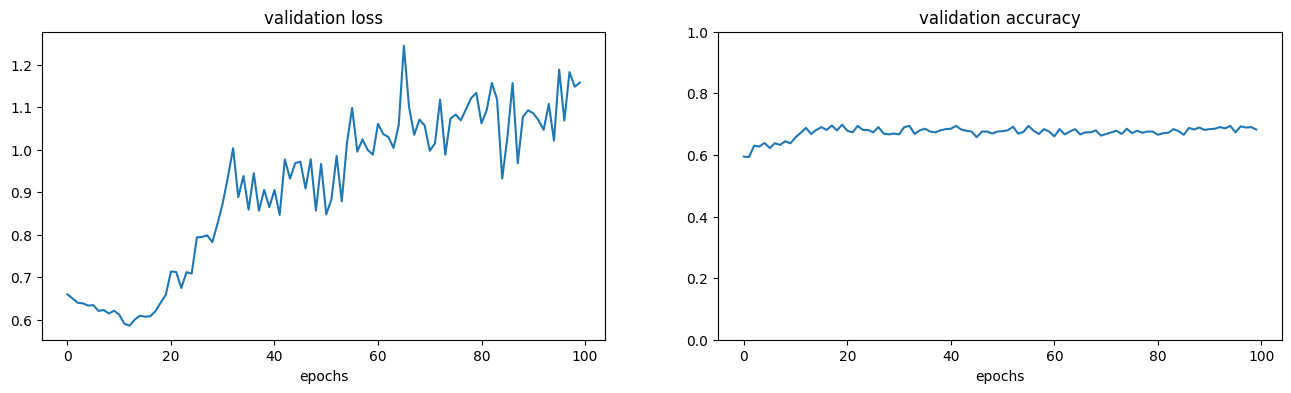

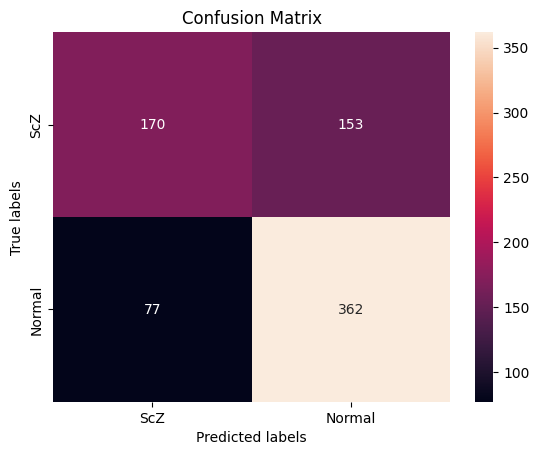

(762, 2)
finished loading 7618 images from 2 categories
train / test split: 6856, 762
training data shape:  (6856, 224, 224, 3)
training labels shape:  (6856, 2)


d:\Milon\pict\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.5937 - loss: 0.6895
Epoch 1: val_accuracy improved from None to 0.59974, saving model to D:/Milon2/81_256/result/cent/a/a2.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 43s 191ms/step - accuracy: 0.6072 - loss: 0.6725 - val_accuracy: 0.5997 - val_loss: 0.6628
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.6338 - loss: 0.6512
Epoch 2: val_accuracy improved from 0.59974 to 0.63386, saving model to D:/Milon2/81_256/result/cent/a/a2.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - accuracy: 0.6270 - loss: 0.6490 - val_accuracy: 0.6339 - val_loss: 0.6479
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.6439 - loss: 0.6383
Epoch 3: val_accuracy did not improve from 0.63386
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - accuracy: 0.6482 - loss: 0.6350 - val_accuracy: 0.6312 - val_loss: 0

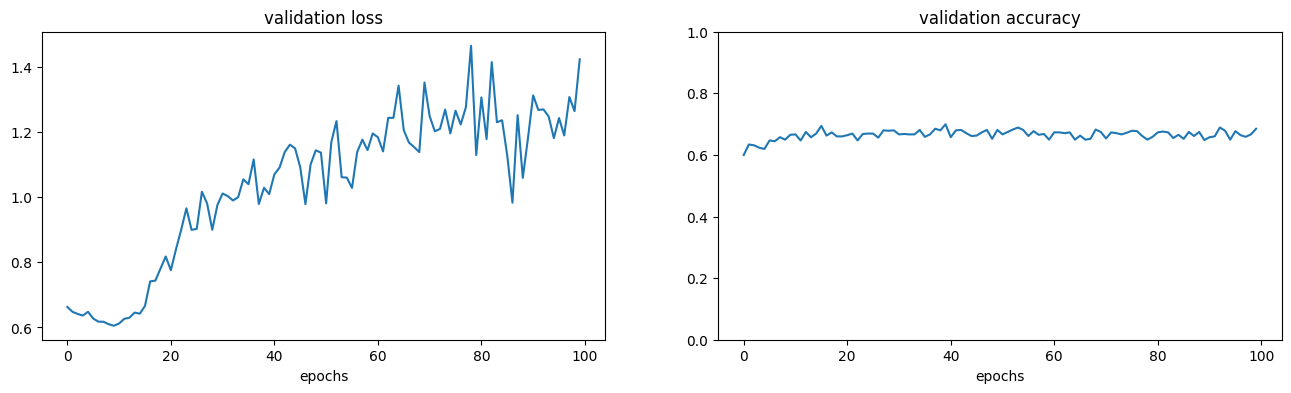

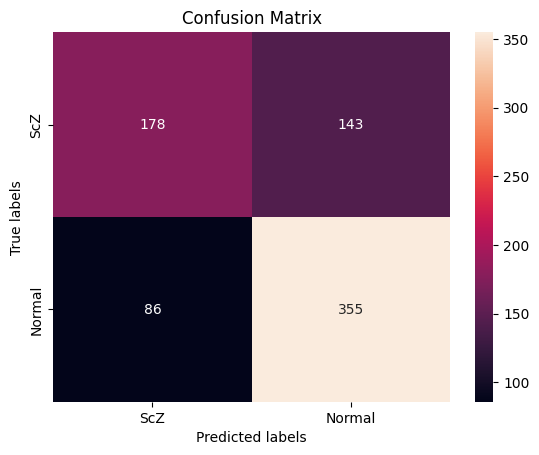

(762, 2)
finished loading 7618 images from 2 categories
train / test split: 6856, 762
training data shape:  (6856, 224, 224, 3)
training labels shape:  (6856, 2)


d:\Milon\pict\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.5958 - loss: 0.6767
Epoch 1: val_accuracy improved from None to 0.62467, saving model to D:/Milon2/81_256/result/cent/a/a3.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 43s 191ms/step - accuracy: 0.6098 - loss: 0.6671 - val_accuracy: 0.6247 - val_loss: 0.6557
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.6377 - loss: 0.6473
Epoch 2: val_accuracy improved from 0.62467 to 0.62730, saving model to D:/Milon2/81_256/result/cent/a/a3.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - accuracy: 0.6349 - loss: 0.6454 - val_accuracy: 0.6273 - val_loss: 0.6530
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.6426 - loss: 0.6335
Epoch 3: val_accuracy improved from 0.62730 to 0.63517, saving model to D:/Milon2/81_256/result/cent/a/a3.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - ac

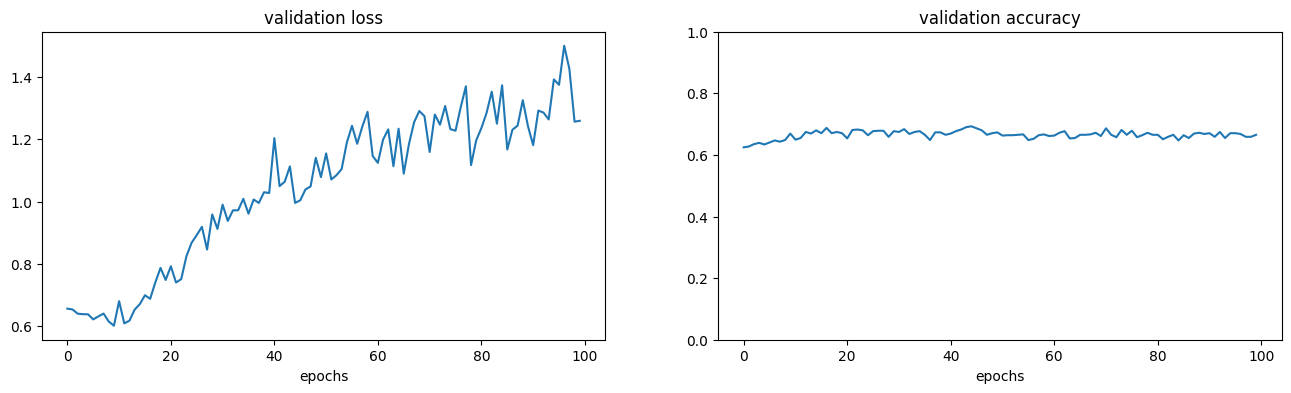

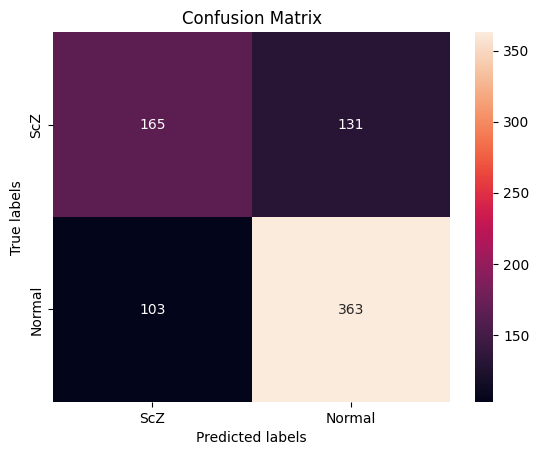

(762, 2)
finished loading 7618 images from 2 categories
train / test split: 6856, 762
training data shape:  (6856, 224, 224, 3)
training labels shape:  (6856, 2)


d:\Milon\pict\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.5680 - loss: 0.6852
Epoch 1: val_accuracy improved from None to 0.61417, saving model to D:/Milon2/81_256/result/cent/a/a4.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 43s 191ms/step - accuracy: 0.6025 - loss: 0.6702 - val_accuracy: 0.6142 - val_loss: 0.6529
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.6186 - loss: 0.6620
Epoch 2: val_accuracy improved from 0.61417 to 0.64961, saving model to D:/Milon2/81_256/result/cent/a/a4.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - accuracy: 0.6342 - loss: 0.6519 - val_accuracy: 0.6496 - val_loss: 0.6352
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.6243 - loss: 0.6492
Epoch 3: val_accuracy improved from 0.64961 to 0.67454, saving model to D:/Milon2/81_256/result/cent/a/a4.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - ac

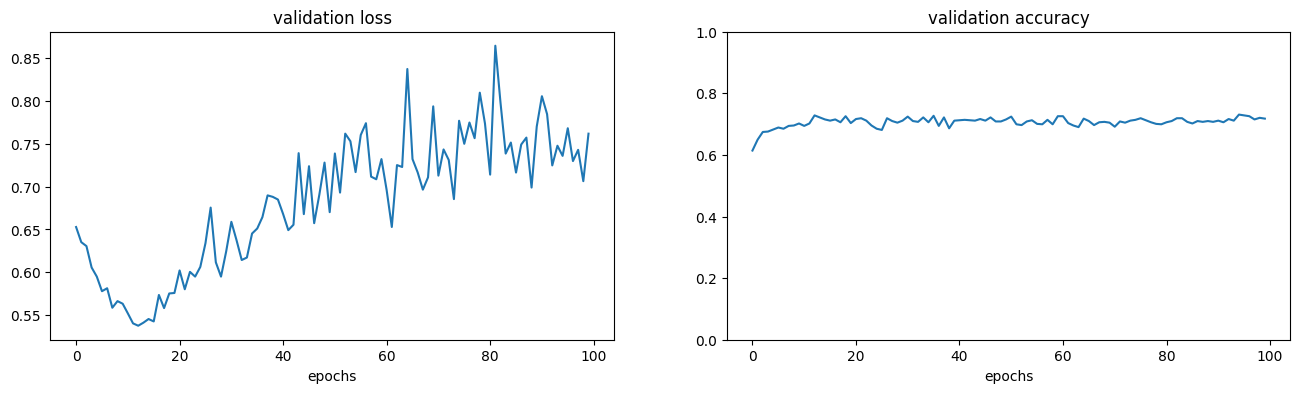

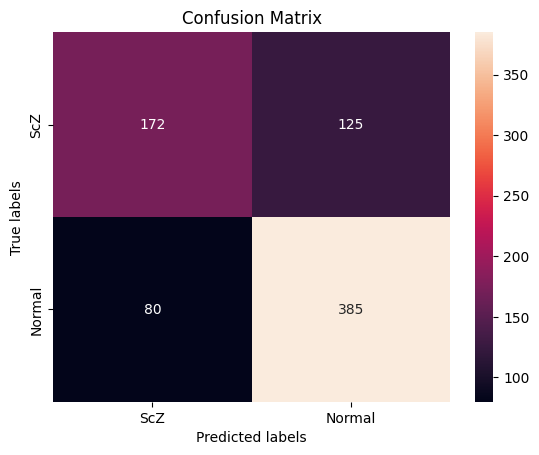

(762, 2)
finished loading 7618 images from 2 categories
train / test split: 6856, 762
training data shape:  (6856, 224, 224, 3)
training labels shape:  (6856, 2)


d:\Milon\pict\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.6030 - loss: 0.6771
Epoch 1: val_accuracy improved from None to 0.64698, saving model to D:/Milon2/81_256/result/cent/a/a5.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 44s 192ms/step - accuracy: 0.6104 - loss: 0.6705 - val_accuracy: 0.6470 - val_loss: 0.6365
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.6190 - loss: 0.6500
Epoch 2: val_accuracy improved from 0.64698 to 0.65748, saving model to D:/Milon2/81_256/result/cent/a/a5.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 191ms/step - accuracy: 0.6298 - loss: 0.6474 - val_accuracy: 0.6575 - val_loss: 0.6266
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.6368 - loss: 0.6396
Epoch 3: val_accuracy improved from 0.65748 to 0.66404, saving model to D:/Milon2/81_256/result/cent/a/a5.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 191ms/step - ac

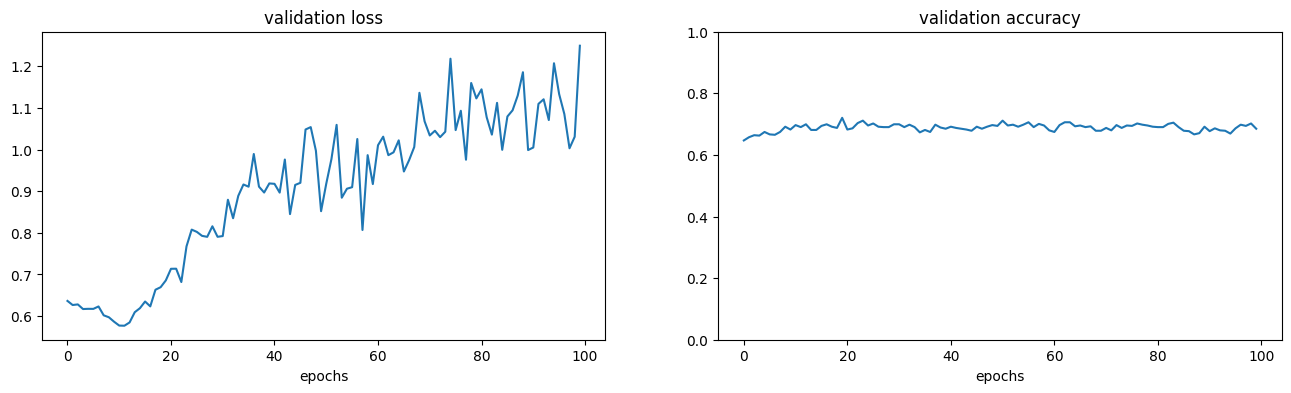

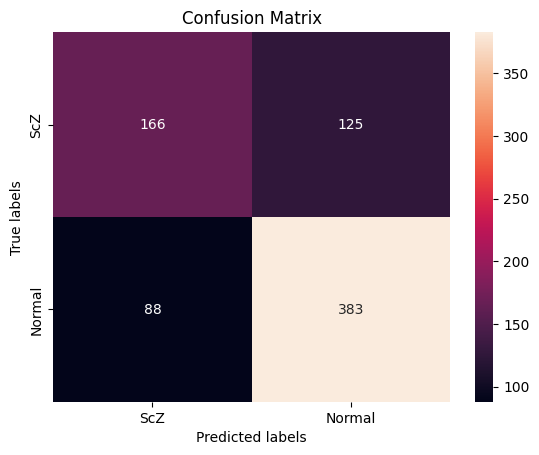

(762, 2)
finished loading 7618 images from 2 categories
train / test split: 6856, 762
training data shape:  (6856, 224, 224, 3)
training labels shape:  (6856, 2)


d:\Milon\pict\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_33 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.6081 - loss: 0.6707
Epoch 1: val_accuracy improved from None to 0.63123, saving model to D:/Milon2/81_256/result/cent/a/a6.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 44s 193ms/step - accuracy: 0.6078 - loss: 0.6691 - val_accuracy: 0.6312 - val_loss: 0.6485
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.6154 - loss: 0.6567
Epoch 2: val_accuracy improved from 0.63123 to 0.67585, saving model to D:/Milon2/81_256/result/cent/a/a6.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 192ms/step - accuracy: 0.6266 - loss: 0.6490 - val_accuracy: 0.6759 - val_loss: 0.6268
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.6343 - loss: 0.6419
Epoch 3: val_accuracy did not improve from 0.67585
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 191ms/step - accuracy: 0.6365 - loss: 0.6386 - val_accuracy: 0.6457 - val_loss: 0

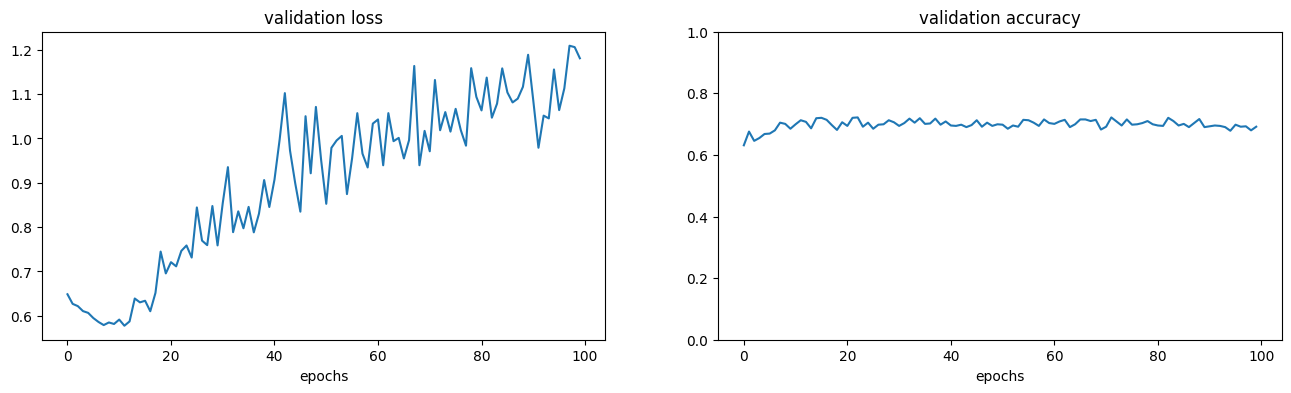

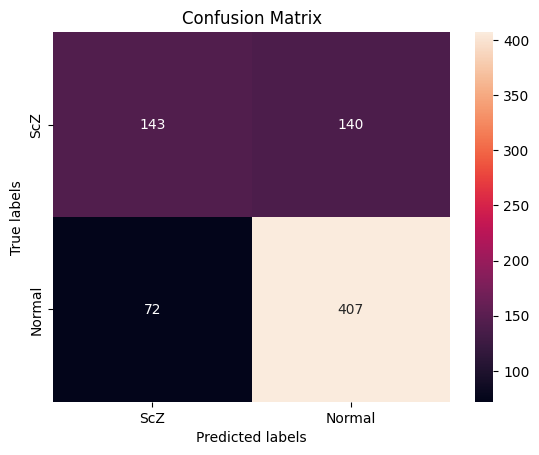

(762, 2)
finished loading 7618 images from 2 categories
train / test split: 6856, 762
training data shape:  (6856, 224, 224, 3)
training labels shape:  (6856, 2)


d:\Milon\pict\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_40 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_41 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.6018 - loss: 0.6754
Epoch 1: val_accuracy improved from None to 0.60892, saving model to D:/Milon2/81_256/result/cent/a/a7.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 43s 192ms/step - accuracy: 0.6107 - loss: 0.6677 - val_accuracy: 0.6089 - val_loss: 0.6575
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.6179 - loss: 0.6521
Epoch 2: val_accuracy improved from 0.60892 to 0.65092, saving model to D:/Milon2/81_256/result/cent/a/a7.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 190ms/step - accuracy: 0.6276 - loss: 0.6480 - val_accuracy: 0.6509 - val_loss: 0.6343
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.6490 - loss: 0.6371
Epoch 3: val_accuracy did not improve from 0.65092
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 190ms/step - accuracy: 0.6453 - loss: 0.6373 - val_accuracy: 0.6483 - val_loss: 0

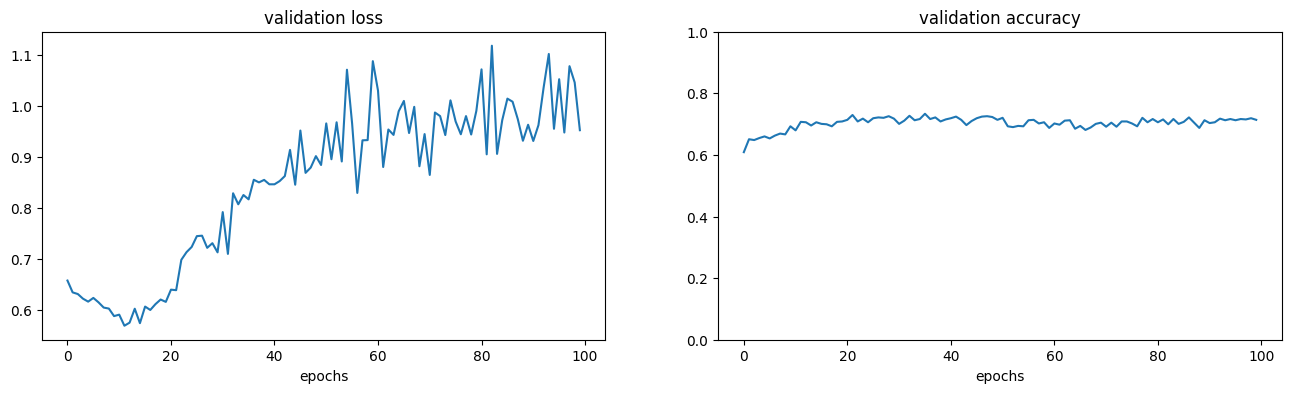

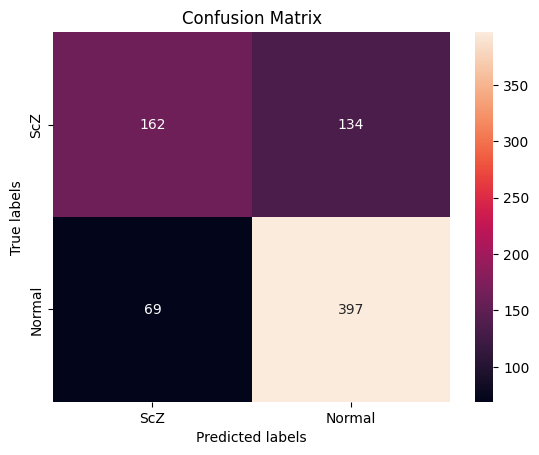

(762, 2)
finished loading 7618 images from 2 categories
train / test split: 6856, 762
training data shape:  (6856, 224, 224, 3)
training labels shape:  (6856, 2)


d:\Milon\pict\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_42 (Activation)      │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_43 (Activation)      │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_44 (Activation)      │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_45 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_46 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_47 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.5908 - loss: 0.6736
Epoch 1: val_accuracy improved from None to 0.61417, saving model to D:/Milon2/81_256/result/cent/a/a8.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 43s 192ms/step - accuracy: 0.6183 - loss: 0.6601 - val_accuracy: 0.6142 - val_loss: 0.6581
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.6389 - loss: 0.6432
Epoch 2: val_accuracy did not improve from 0.61417
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 190ms/step - accuracy: 0.6387 - loss: 0.6426 - val_accuracy: 0.6089 - val_loss: 0.6526
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.6591 - loss: 0.6296
Epoch 3: val_accuracy did not improve from 0.61417
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 190ms/step - accuracy: 0.6530 - loss: 0.6302 - val_accuracy: 0.6089 - val_loss: 0.6548
Epoch 4/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - acc

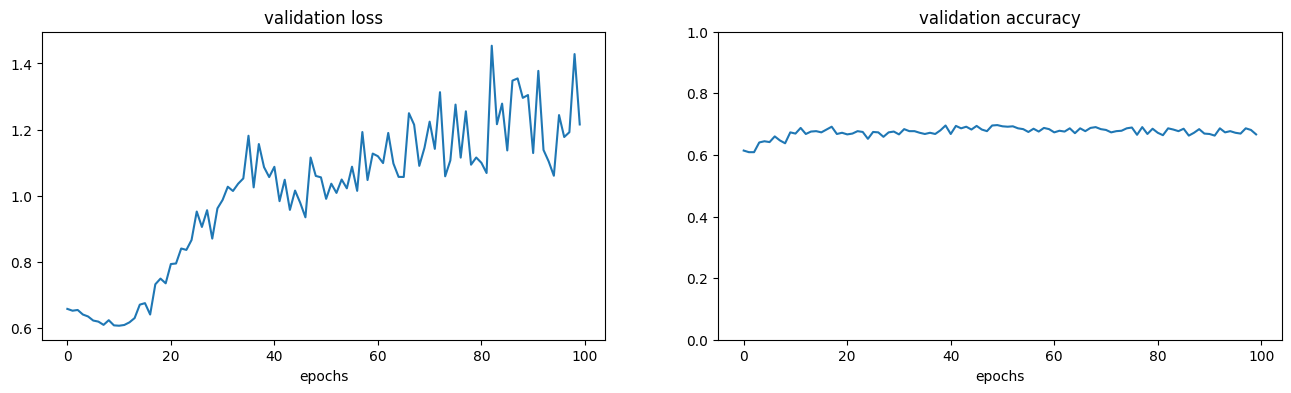

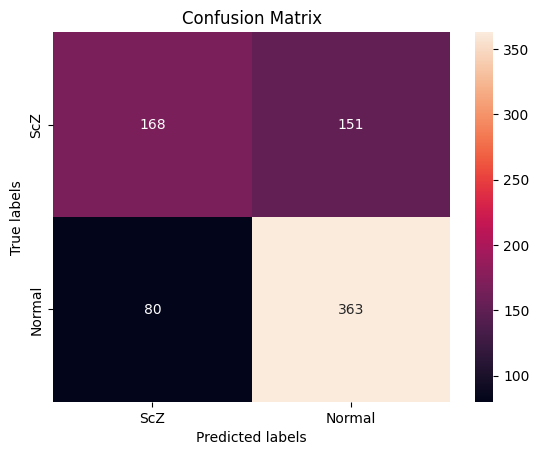

(761, 2)
finished loading 7618 images from 2 categories
train / test split: 6857, 761
training data shape:  (6857, 224, 224, 3)
training labels shape:  (6857, 2)


d:\Milon\pict\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_48 (Activation)      │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_49 (Activation)      │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_50 (Activation)      │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_51 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_52 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_53 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.5903 - loss: 0.6824
Epoch 1: val_accuracy improved from None to 0.63338, saving model to D:/Milon2/81_256/result/cent/a/a9.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 44s 197ms/step - accuracy: 0.6019 - loss: 0.6741 - val_accuracy: 0.6334 - val_loss: 0.6416
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.6230 - loss: 0.6571
Epoch 2: val_accuracy improved from 0.63338 to 0.64126, saving model to D:/Milon2/81_256/result/cent/a/a9.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 42s 196ms/step - accuracy: 0.6208 - loss: 0.6561 - val_accuracy: 0.6413 - val_loss: 0.6395
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.6485 - loss: 0.6361
Epoch 3: val_accuracy improved from 0.64126 to 0.64783, saving model to D:/Milon2/81_256/result/cent/a/a9.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 42s 196ms/step - ac

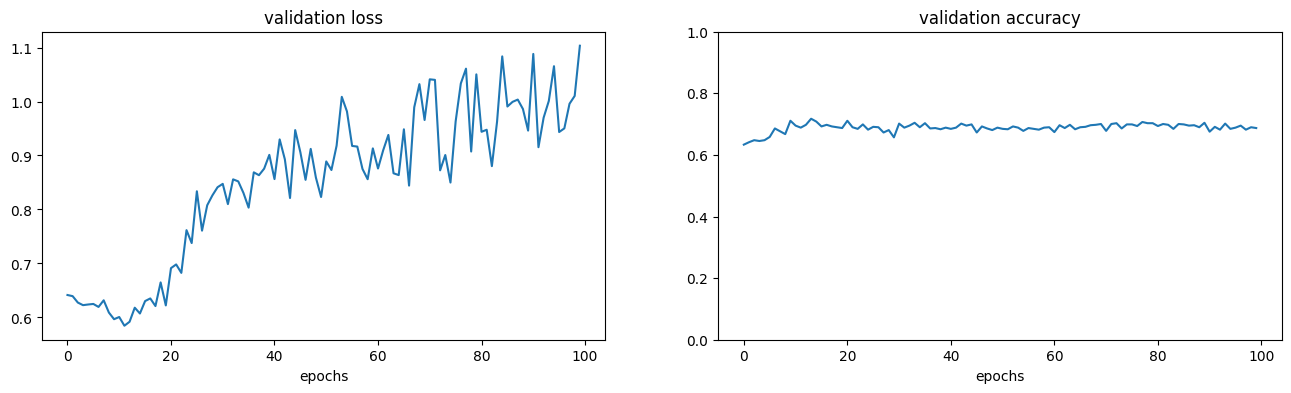

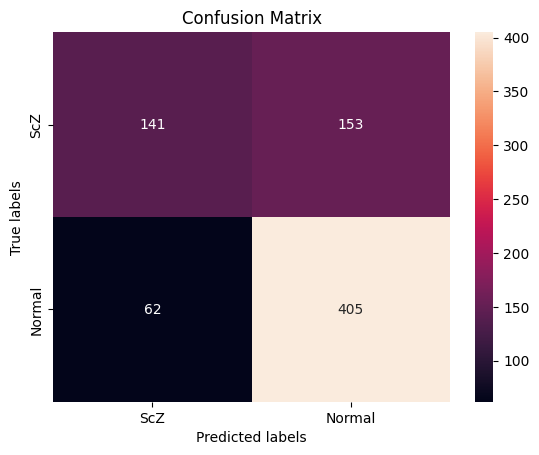

(761, 2)
finished loading 7618 images from 2 categories
train / test split: 6857, 761
training data shape:  (6857, 224, 224, 3)
training labels shape:  (6857, 2)


d:\Milon\pict\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_54 (Activation)      │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_55 (Activation)      │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_56 (Activation)      │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_57 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_58 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_59 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.6035 - loss: 0.6778
Epoch 1: val_accuracy improved from None to 0.65834, saving model to D:/Milon2/81_256/result/cent/a/a10.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 45s 198ms/step - accuracy: 0.6128 - loss: 0.6681 - val_accuracy: 0.6583 - val_loss: 0.6348
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.6415 - loss: 0.6369
Epoch 2: val_accuracy improved from 0.65834 to 0.66886, saving model to D:/Milon2/81_256/result/cent/a/a10.best.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 42s 195ms/step - accuracy: 0.6326 - loss: 0.6457 - val_accuracy: 0.6689 - val_loss: 0.6289
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.6282 - loss: 0.6418
Epoch 3: val_accuracy did not improve from 0.66886
215/215 ━━━━━━━━━━━━━━━━━━━━ 42s 195ms/step - accuracy: 0.6414 - loss: 0.6364 - val_accuracy: 0.6610 - val_loss

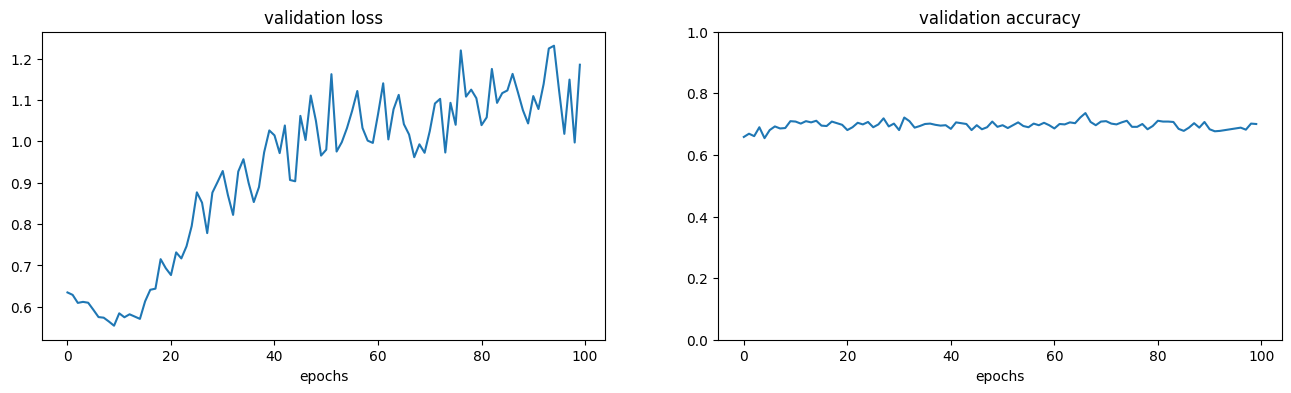

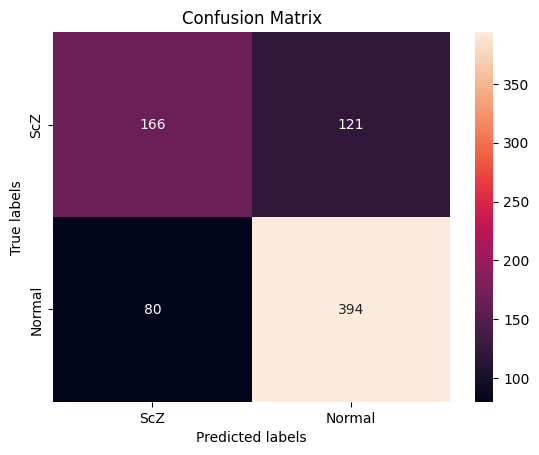

In [ ]:

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Additional performance metric containers
specificity_per_fold = []
sensitivity_per_fold = []
precision_per_fold = []
f1_per_fold = []
fpr_per_fold = []

# For combined confusion matrix
all_y_true = []
all_y_pred = []

import tensorflow as tf
import pandas as pd
from tensorflow.keras import utils as np_utils

tf.keras.backend.clear_session()

# K-fold Cross Validation model evaluation
fold_no = 1
for fold_no in range(1, 11):

    train=pd.read_csv(f"D:/Milon2/81_256/result/cent/train/train{fold_no}.csv", sep=',',header=None)
    test=pd.read_csv(f"D:/Milon2/81_256/result/cent/test/test{fold_no}.csv", sep=',',header=None)

    x_train = X[train[0]]
    y_train = y[train[0]]
    x_test = X[test[0]]
    y_test = y[test[0]]

    # convert labels to one-hot vectors
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test = np_utils.to_categorical(y_test, num_classes)
    print(y_test.shape)

    # summary
    print("finished loading %d images from %d categories"%(len(data), num_classes))
    print("train / test split: %d, %d"%(len(x_train), len(x_test)))
    print("training data shape: ", x_train.shape)
    print("training labels shape: ", y_train.shape)

    # build the network
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.25))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))

    model.add(Dropout(0.5))

    model.add(Dense(2))
    model.add(Activation('softmax'))


    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.summary()
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    filepath=f"D:/Milon2/81_256/result/cent/a/a{fold_no}.best.keras"

    # define early stopping callback
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=150, mode='auto')

    # saves the model weights after each epoch if the validation loss decreased
    checkpointer = ModelCheckpoint(filepath=filepath, verbose=1, save_best_only=True, monitor='val_accuracy')

    callbacks_list = [earlystop, checkpointer]

    history = model.fit(x_train, y_train, epochs = 100, batch_size=32,validation_data= (x_test, y_test), callbacks = callbacks_list)

    #load saved best model
    model = load_model(filepath)

    # Generate generalization metrics
    scores = model.evaluate(x_test, y_test, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    Y_pred = model.predict(x_test)
    y_pred = np.argmax(Y_pred, axis=1)
    y_text_new = np.argmax(y_test, axis=1)

    # Store predictions for combined confusion matrix
    all_y_true.extend(y_text_new)
    all_y_pred.extend(y_pred)

    from sklearn.metrics import classification_report, confusion_matrix
    #Confution Matrix and Classification Report

    print('Confusion Matrix')
    confusion = confusion_matrix(y_text_new, y_pred)
    print(confusion)
    print('Classification Report')
    target_names = ['ScZ', 'Healthy']
    print(classification_report(y_text_new, y_pred, target_names=target_names))

    # Calculate detailed performance metrics
    tn, fp, fn, tp = confusion.ravel()

    # Calculate metrics
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

    # Store metrics
    specificity_per_fold.append(specificity * 100)
    sensitivity_per_fold.append(sensitivity * 100)
    precision_per_fold.append(precision * 100)
    f1_per_fold.append(f1_score * 100)
    fpr_per_fold.append(fpr * 100)

    print(f'Fold {fold_no} Detailed Metrics:')
    print(f'Specificity: {specificity:.4f} ({specificity*100:.2f}%)')
    print(f'Sensitivity (Recall): {sensitivity:.4f} ({sensitivity*100:.2f}%)')
    print(f'Precision: {precision:.4f} ({precision*100:.2f}%)')
    print(f'F1 Score: {f1_score:.4f} ({f1_score*100:.2f}%)')
    print(f'FPR: {fpr:.4f} ({fpr*100:.2f}%)')
    print('------------------------------------------------------------------------')

    fig = plt.figure(figsize=(16,4))
    ax = fig.add_subplot(121)
    ax.plot(history.history["val_loss"])
    ax.set_title("validation loss")
    ax.set_xlabel("epochs")

    ax2 = fig.add_subplot(122)
    ax2.plot(history.history["val_accuracy"])
    ax2.set_title("validation accuracy")
    ax2.set_xlabel("epochs")
    ax2.set_ylim(0, 1)

    plt.show()

    ax= plt.subplot()
    sns.heatmap(confusion, annot=True, fmt="d", ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['ScZ', 'Normal']); ax.yaxis.set_ticklabels(['ScZ', 'Normal']);
    plt.show()

                          COMPREHENSIVE RESULTS                        
Score per fold
------------------------------------------------------------------------
> Fold 1:
  - Accuracy: 69.82%
  - Loss: 0.6585
  - Specificity: 52.63%
  - Sensitivity: 82.46%
  - Precision: 70.29%
  - F1 Score: 75.89%
  - FPR: 47.37%
------------------------------------------------------------------------
> Fold 2:
  - Accuracy: 69.95%
  - Loss: 1.0087
  - Specificity: 55.45%
  - Sensitivity: 80.50%
  - Precision: 71.29%
  - F1 Score: 75.61%
  - FPR: 44.55%
------------------------------------------------------------------------
> Fold 3:
  - Accuracy: 69.29%
  - Loss: 0.9958
  - Specificity: 55.74%
  - Sensitivity: 77.90%
  - Precision: 73.48%
  - F1 Score: 75.63%
  - FPR: 44.26%
------------------------------------------------------------------------
> Fold 4:
  - Accuracy: 73.10%
  - Loss: 0.7359
  - Specificity: 57.91%
  - Sensitivity: 82.80%
  - Precision: 75.49%
  - F1 Score: 78.97%
  - FPR: 42.09%
-

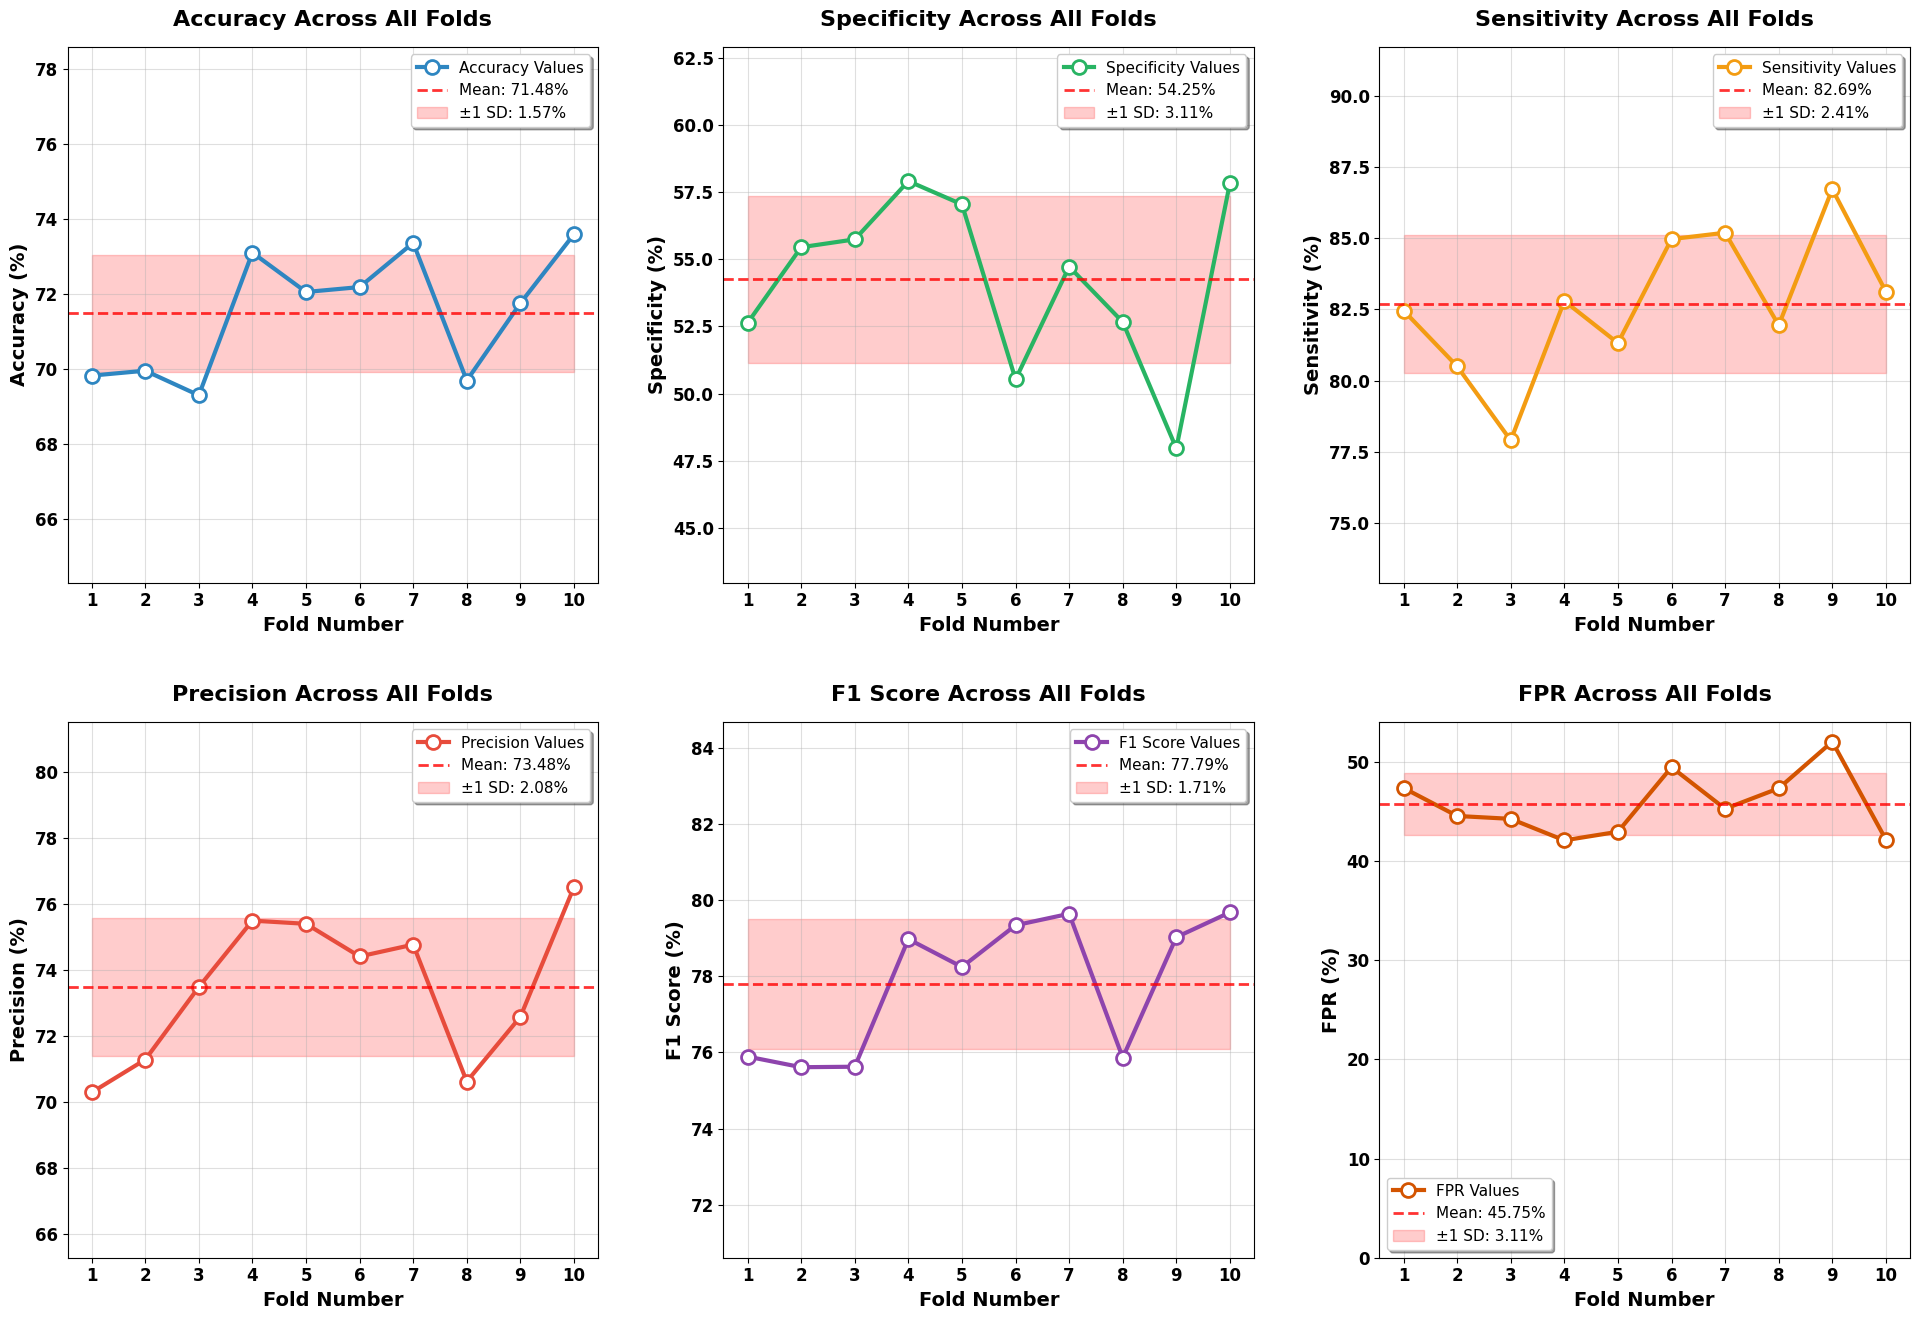

In [ ]:
# == Provide average scores ==
print('========================================================================')
print('                          COMPREHENSIVE RESULTS                        ')
print('========================================================================')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1}:')
  print(f'  - Accuracy: {acc_per_fold[i]:.2f}%')
  print(f'  - Loss: {loss_per_fold[i]:.4f}')
  print(f'  - Specificity: {specificity_per_fold[i]:.2f}%')
  print(f'  - Sensitivity: {sensitivity_per_fold[i]:.2f}%')
  print(f'  - Precision: {precision_per_fold[i]:.2f}%')
  print(f'  - F1 Score: {f1_per_fold[i]:.2f}%')
  print(f'  - FPR: {fpr_per_fold[i]:.2f}%')

print('========================================================================')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold):.2f}% (± {np.std(acc_per_fold):.2f}%)')
print(f'> Loss: {np.mean(loss_per_fold):.4f} (± {np.std(loss_per_fold):.4f})')
print(f'> Specificity: {np.mean(specificity_per_fold):.2f}% (± {np.std(specificity_per_fold):.2f}%)')
print(f'> Sensitivity: {np.mean(sensitivity_per_fold):.2f}% (± {np.std(sensitivity_per_fold):.2f}%)')
print(f'> Precision: {np.mean(precision_per_fold):.2f}% (± {np.std(precision_per_fold):.2f}%)')
print(f'> F1 Score: {np.mean(f1_per_fold):.2f}% (± {np.std(f1_per_fold):.2f}%)')
print(f'> FPR: {np.mean(fpr_per_fold):.2f}% (± {np.std(fpr_per_fold):.2f}%)')
print('========================================================================')

# Fold-wise performance visualization
plt.figure(figsize=(20, 14))
plt.rcParams.update({'font.size': 12})  # Set global font size

# Plot each metric across folds
metrics = ['Accuracy', 'Specificity', 'Sensitivity', 'Precision', 'F1 Score', 'FPR']
metric_data = [acc_per_fold, specificity_per_fold, sensitivity_per_fold,
               precision_per_fold, f1_per_fold, fpr_per_fold]

# Color palette for different metrics
colors = ['#2E86C1', '#28B463', '#F39C12', '#E74C3C', '#8E44AD', '#D35400']

for i, (metric, data) in enumerate(zip(metrics, metric_data)):
    plt.subplot(2, 3, i+1)
    folds = range(1, num_folds+1)

    # Plot main line with enhanced styling
    plt.plot(folds, data, 'o-', linewidth=3, markersize=10, color=colors[i],
             markerfacecolor='white', markeredgewidth=2, markeredgecolor=colors[i],
             label=f'{metric} Values')

    plt.title(f'{metric} Across All Folds', fontsize=16, fontweight='bold', pad=15)
    plt.xlabel('Fold Number', fontsize=14, fontweight='bold')
    plt.ylabel(f'{metric} (%)', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.4, linestyle='-', linewidth=0.8)
    plt.xticks(folds, fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')

    # Add mean line with improved styling
    mean_val = np.mean(data)
    std_val = np.std(data)
    plt.axhline(y=mean_val, color='red', linestyle='--', linewidth=2, alpha=0.8,
                label=f'Mean: {mean_val:.2f}%')

    # Add standard deviation band
    plt.fill_between(folds, mean_val - std_val, mean_val + std_val,
                     alpha=0.2, color='red', label=f'±1 SD: {std_val:.2f}%')

    # Customize legend
    plt.legend(loc='best', fontsize=11, frameon=True, fancybox=True, shadow=True)

    # Set y-axis limits for better visualization
    if metric != 'FPR':
        plt.ylim(max(0, min(data) - 5), min(100, max(data) + 5))
    else:
        plt.ylim(0, max(data) + 2)

plt.tight_layout(pad=3.0)
plt.suptitle('',
             fontsize=20, fontweight='bold', y=0.98)
plt.show()



In [ ]:
# Radar plot for average performance
from math import pi
import matplotlib.pyplot as plt


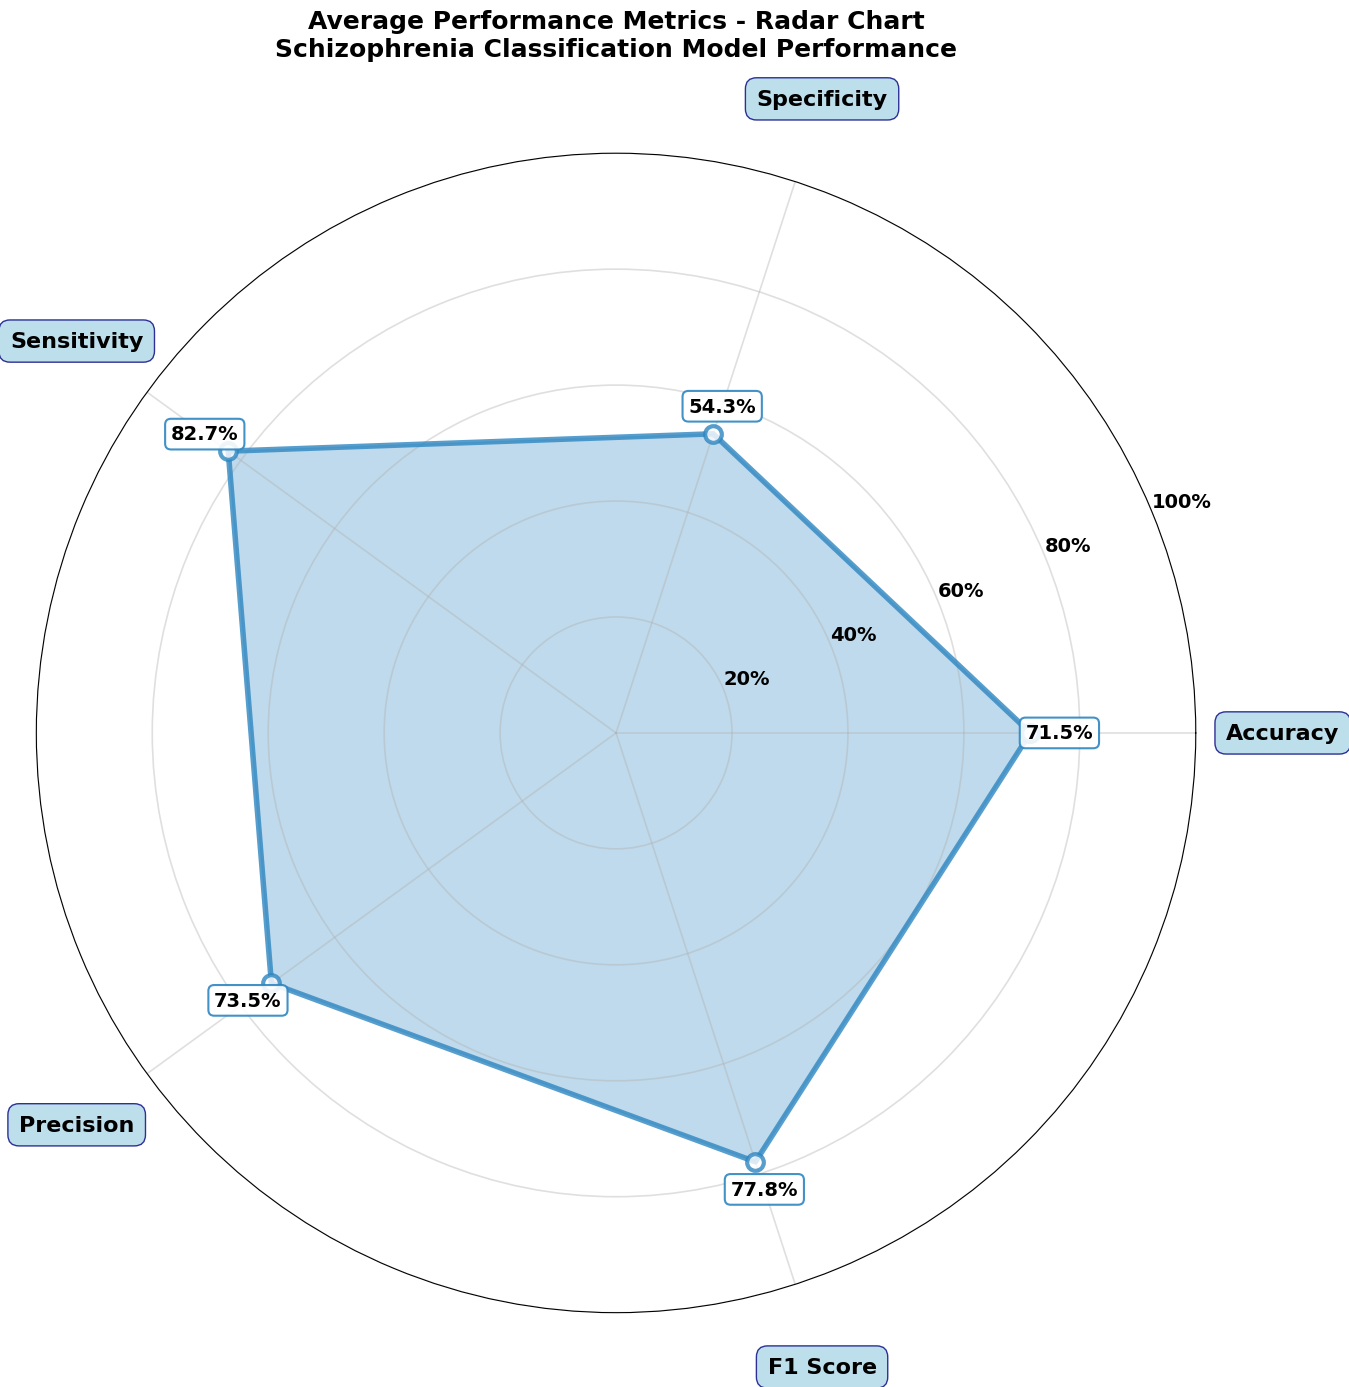

In [ ]:
# Create radar plot with enhanced styling
categories_radar = ['Accuracy', 'Specificity', 'Sensitivity', 'Precision', 'F1 Score']
values = [np.mean(acc_per_fold), np.mean(specificity_per_fold),
          np.mean(sensitivity_per_fold), np.mean(precision_per_fold),
          np.mean(f1_per_fold)]

# Number of variables
N = len(categories_radar)

# Compute angle for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the circle

# Add values to complete the circle
values += values[:1]

# Create the plot with enhanced styling
fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(projection='polar'))

# Plot the values with enhanced styling
ax.plot(angles, values, 'o-', linewidth=4, color='#2E86C1', alpha=0.8,
        markersize=12, markerfacecolor='white', markeredgewidth=3, markeredgecolor='#2E86C1')
ax.fill(angles, values, alpha=0.3, color='#2E86C1')

# Add labels with proper font sizes - positioned further outside
ax.set_xticks(angles[:-1])
ax.set_xticklabels([])  # Remove default labels

# Manually position category labels further outside
for angle, category in zip(angles[:-1], categories_radar):
    # Position labels much further outside the chart
    label_distance = 115  # Much further than the 100% circle
    ax.text(angle, label_distance, category,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=16,
            fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5',
                     facecolor='lightblue',
                     alpha=0.8,
                     edgecolor='navy',
                     linewidth=1))

# Set y-axis limits and labels
ax.set_ylim(0, 100)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=14, fontweight='bold')

# Add enhanced grid
ax.grid(True, alpha=0.4, linewidth=1.2)

# Add values as text with better positioning - closer to the data points
for angle, value in zip(angles[:-1], values[:-1]):
    # Position value labels closer to the actual data points
    value_distance = value + 5  # Just slightly outside the data point
    ax.text(angle, value_distance, f'{value:.1f}%',
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=14,
            fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3',
                     facecolor='white',
                     edgecolor='#2E86C1',
                     alpha=0.9,
                     linewidth=1.5))

plt.title('Average Performance Metrics - Radar Chart\nSchizophrenia Classification Model Performance',
          size=18, fontweight='bold', pad=70)
plt.tight_layout()
plt.show()

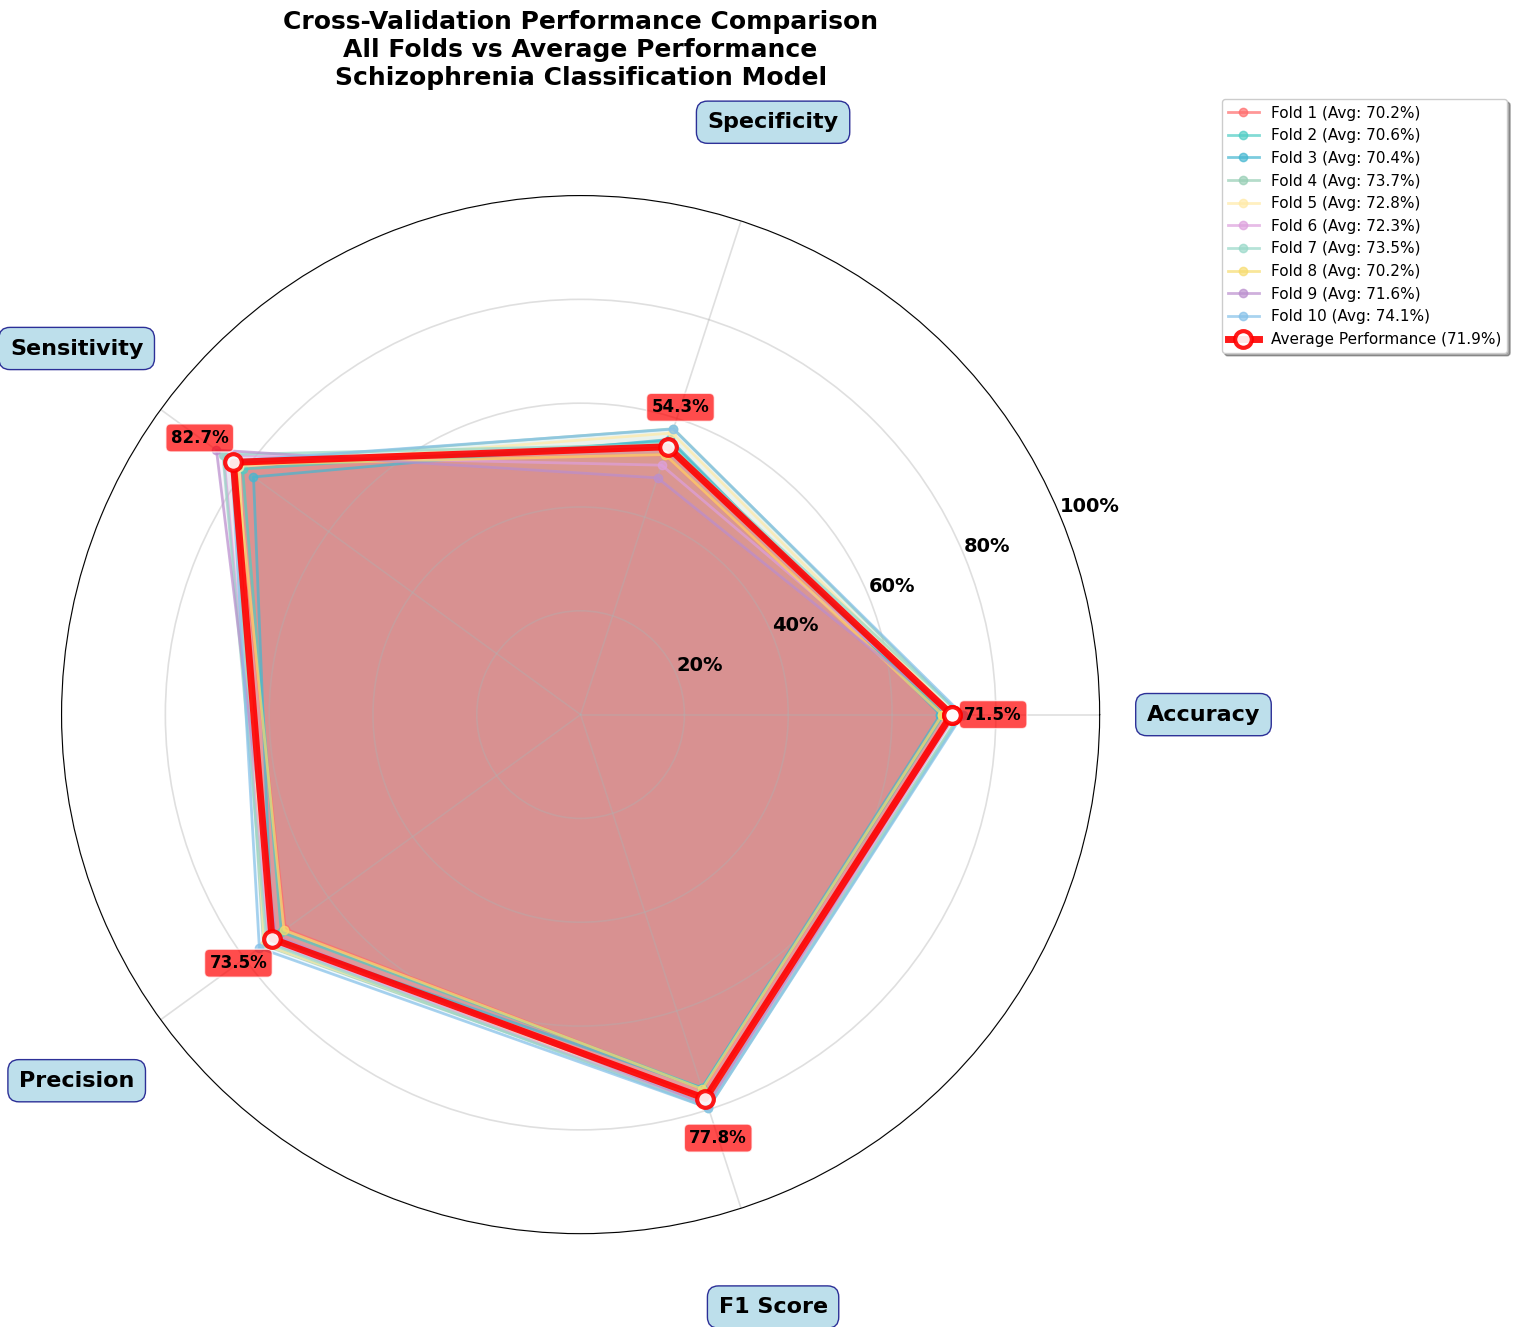

In [ ]:
# Summary comparison plot - All folds on one radar plot
fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=dict(projection='polar'))

# Enhanced colors for better distinction
fold_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7',
               '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E9']

# Plot each fold on the same radar plot
for fold_idx in range(10):
    fold_values = [acc_per_fold[fold_idx], specificity_per_fold[fold_idx],
                   sensitivity_per_fold[fold_idx], precision_per_fold[fold_idx],
                   f1_per_fold[fold_idx]]

    # Add values to complete the circle
    fold_values_plot = fold_values + fold_values[:1]

    # Plot the values with enhanced styling
    ax.plot(angles, fold_values_plot, 'o-', linewidth=2,
            color=fold_colors[fold_idx], alpha=0.7, markersize=6,
            label=f'Fold {fold_idx + 1} (Avg: {np.mean(fold_values):.1f}%)')
    ax.fill(angles, fold_values_plot, alpha=0.1, color=fold_colors[fold_idx])

# Plot average line with enhanced styling
avg_values = [np.mean(acc_per_fold), np.mean(specificity_per_fold),
              np.mean(sensitivity_per_fold), np.mean(precision_per_fold),
              np.mean(f1_per_fold)]
avg_values_plot = avg_values + avg_values[:1]

ax.plot(angles, avg_values_plot, 'o-', linewidth=5,
        color='red', alpha=0.9, markersize=12,
        markerfacecolor='white', markeredgewidth=3, markeredgecolor='red',
        label=f'Average Performance ({np.mean(avg_values):.1f}%)', zorder=10)
ax.fill(angles, avg_values_plot, alpha=0.3, color='red')

# Fix category labels - position them further outside
ax.set_xticks(angles[:-1])
ax.set_xticklabels([])  # Remove default labels

# Manually position category labels further outside the chart
for angle, category in zip(angles[:-1], categories_radar):
    # Position labels much further outside the chart
    label_distance = 120  # Much further than the 100% circle
    ax.text(angle, label_distance, category,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=16,
            fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5',
                     facecolor='lightblue',
                     alpha=0.8,
                     edgecolor='navy',
                     linewidth=1))

# Set y-axis limits and labels
ax.set_ylim(0, 100)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=14, fontweight='bold')

# Add enhanced grid
ax.grid(True, alpha=0.4, linewidth=1.2)

# Add comprehensive legend
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1), fontsize=11,
          frameon=True, fancybox=True, shadow=True, ncol=1)

# Add average values as text - positioned closer to data points
for angle, value in zip(angles[:-1], avg_values):
    value_distance = value + 8  # Just slightly outside the data point
    ax.text(angle, value_distance, f'{value:.1f}%',
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=12,
            fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3',
                     facecolor='red',
                     alpha=0.7,
                     edgecolor='white'))

plt.title('Cross-Validation Performance Comparison\nAll Folds vs Average Performance\nSchizophrenia Classification Model',
          size=18, fontweight='bold', pad=80)
plt.tight_layout()
plt.show()

Generating comprehensive box plots with standard deviation...


C:\Users\Milon\AppData\Local\Temp\ipykernel_18600\1981777884.py:71: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(pad=3.0)
d:\Milon\pict\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


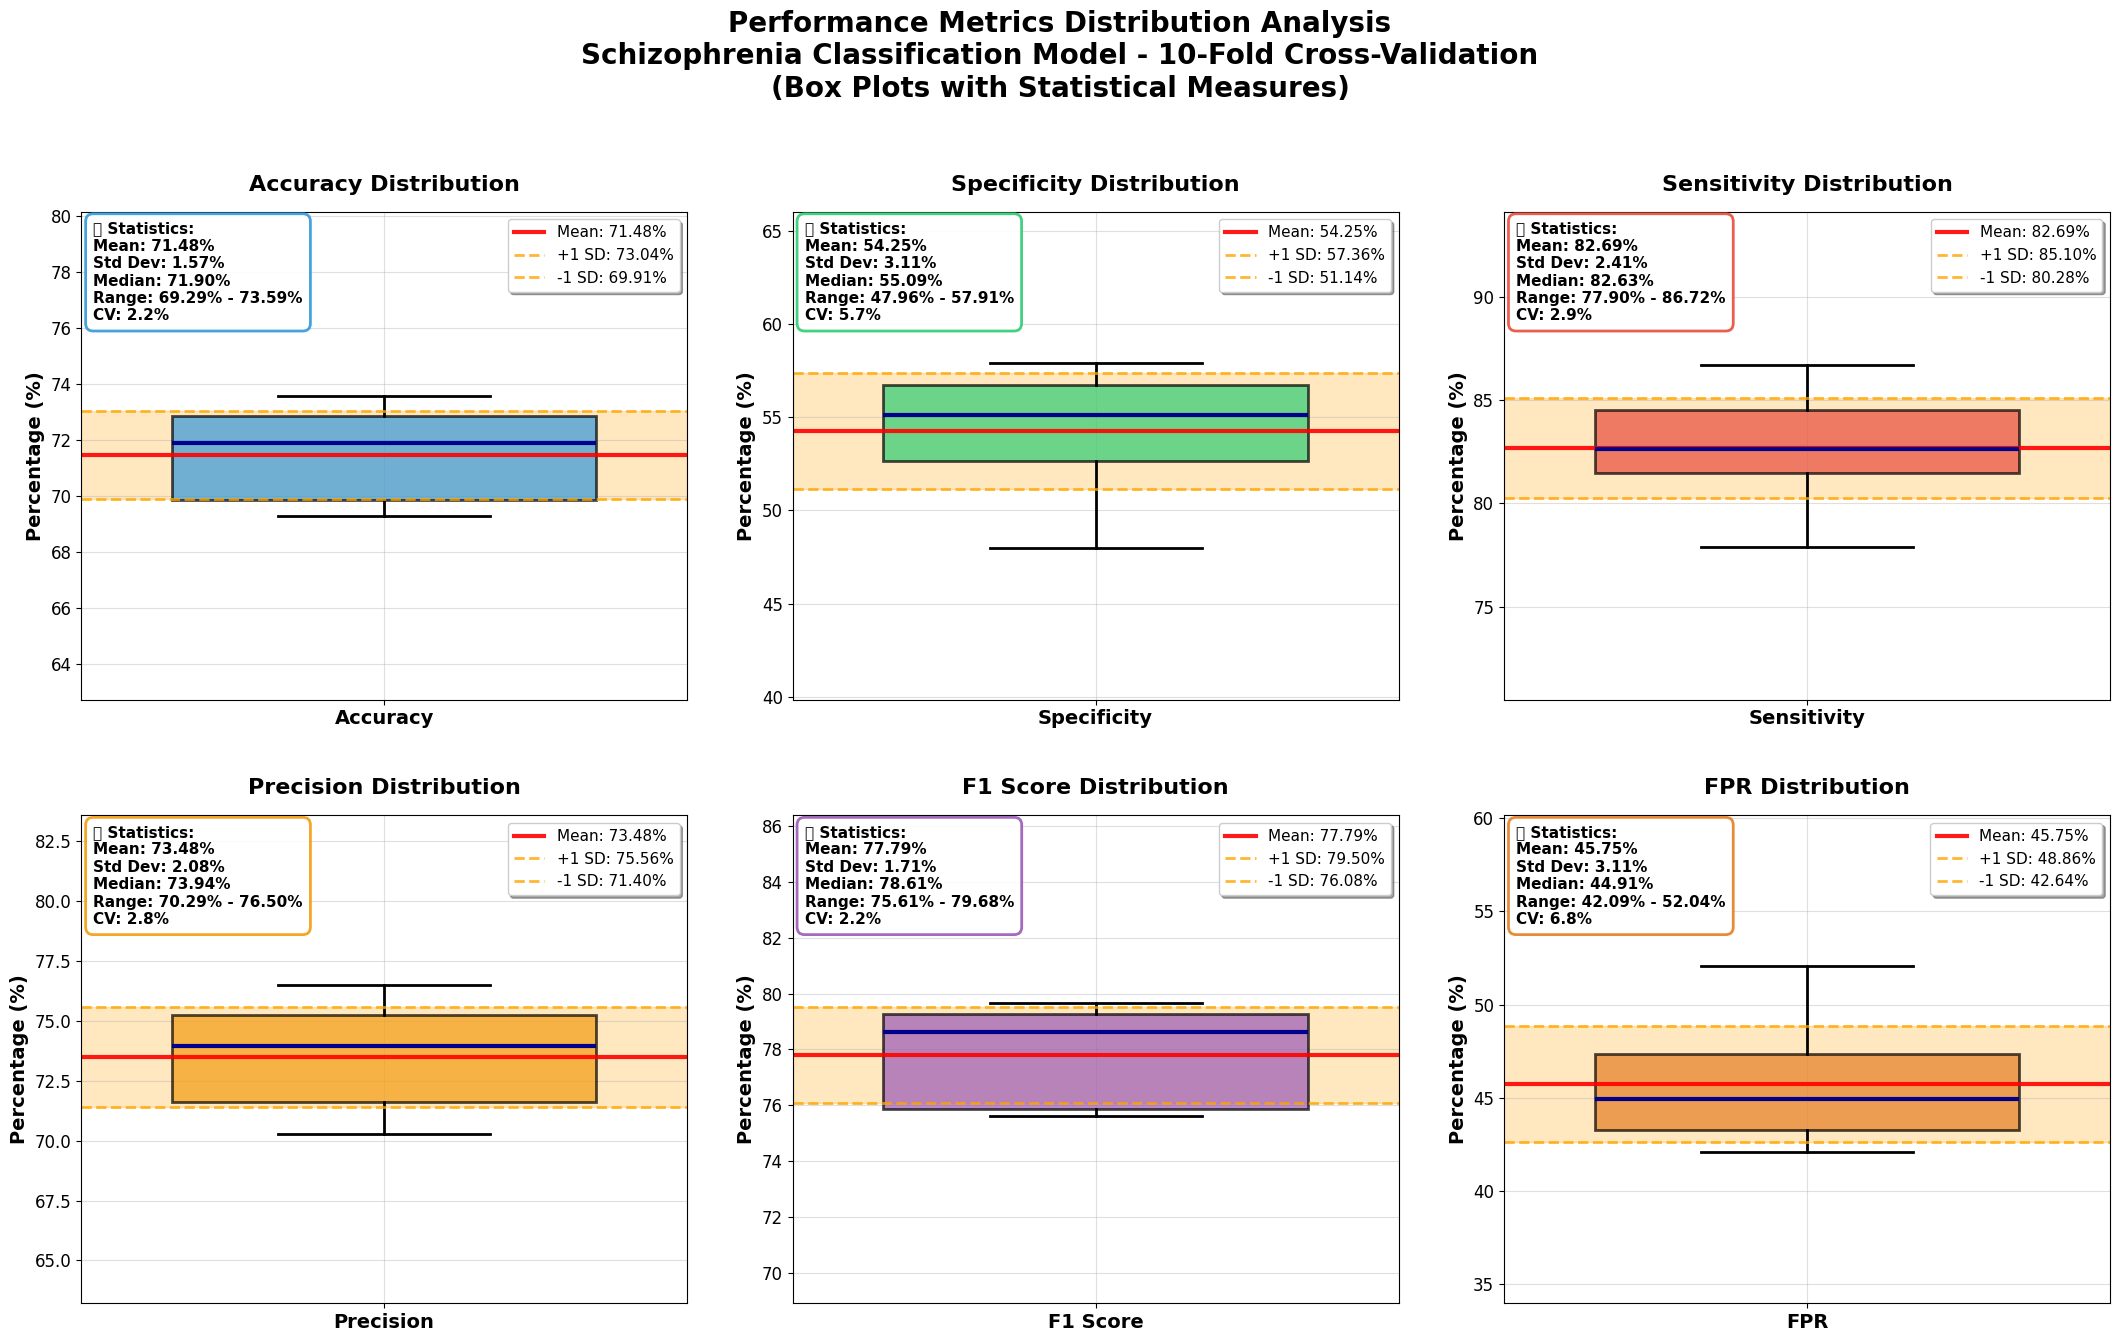

In [ ]:
# Box Plots with Standard Deviation
print('Generating comprehensive box plots with standard deviation...')

# Prepare data for box plots
metrics_names = ['Accuracy', 'Specificity', 'Sensitivity', 'Precision', 'F1 Score', 'FPR']
metrics_data = [acc_per_fold, specificity_per_fold, sensitivity_per_fold,
                precision_per_fold, f1_per_fold, fpr_per_fold]

# Enhanced color palette
box_colors = ['#3498DB', '#2ECC71', '#E74C3C', '#F39C12', '#9B59B6', '#E67E22']

# Create comprehensive box plot
fig, axes = plt.subplots(2, 3, figsize=(22, 14))
fig.suptitle('Performance Metrics Distribution Analysis\nSchizophrenia Classification Model - 10-Fold Cross-Validation\n(Box Plots with Statistical Measures)',
             fontsize=20, fontweight='bold', y=0.98)

# Flatten axes for easier iteration
axes_flat = axes.flatten()

for i, (metric_name, metric_values) in enumerate(zip(metrics_names, metrics_data)):
    ax = axes_flat[i]

    # Create box plot with enhanced styling
    bp = ax.boxplot(metric_values, patch_artist=True, widths=0.7,
                    boxprops=dict(facecolor=box_colors[i], alpha=0.7, linewidth=2),
                    medianprops=dict(color='darkblue', linewidth=3),
                    whiskerprops=dict(linewidth=2),
                    capprops=dict(linewidth=2),
                    flierprops=dict(marker='o', markerfacecolor='red', markersize=8, alpha=0.7))

    # Calculate statistics
    mean_val = np.mean(metric_values)
    std_val = np.std(metric_values)
    median_val = np.median(metric_values)
    min_val = np.min(metric_values)
    max_val = np.max(metric_values)

    # Add mean line with enhanced styling
    ax.axhline(y=mean_val, color='red', linestyle='-', linewidth=3, alpha=0.9,
               label=f'Mean: {mean_val:.2f}%')

    # Add standard deviation bands
    ax.axhline(y=mean_val + std_val, color='orange', linestyle='--', linewidth=2, alpha=0.8,
               label=f'+1 SD: {mean_val + std_val:.2f}%')
    ax.axhline(y=mean_val - std_val, color='orange', linestyle='--', linewidth=2, alpha=0.8,
               label=f'-1 SD: {mean_val - std_val:.2f}%')
    ax.fill_between([0.5, 1.5], mean_val - std_val, mean_val + std_val, alpha=0.25, color='orange')

    # Enhanced plot customization
    ax.set_title(f'{metric_name} Distribution', fontsize=16, fontweight='bold', pad=15)
    ax.set_ylabel('Percentage (%)', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.4, linestyle='-', linewidth=0.8)
    ax.legend(loc='upper right', fontsize=11, frameon=True, fancybox=True, shadow=True)

    # Enhanced statistics text box
    stats_text = f'📊 Statistics:\nMean: {mean_val:.2f}%\nStd Dev: {std_val:.2f}%\nMedian: {median_val:.2f}%\nRange: {min_val:.2f}% - {max_val:.2f}%\nCV: {(std_val/mean_val)*100:.1f}%'
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=11, fontweight='bold',
            verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9,
                     edgecolor=box_colors[i], linewidth=2))

    # Enhanced x-axis labeling
    ax.set_xticklabels([metric_name], fontsize=14, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12, labelcolor='black')

    # Set appropriate y-limits
    y_min = max(0, min_val - std_val - 5)
    y_max = min(100 if metric_name != 'FPR' else max_val + std_val + 5, max_val + std_val + 5)
    ax.set_ylim(y_min, y_max)

plt.tight_layout(pad=3.0)
plt.show()

C:\Users\Milon\AppData\Local\Temp\ipykernel_18600\3907595124.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(combined_data, labels=combined_labels, patch_artist=True, widths=0.7,
C:\Users\Milon\AppData\Local\Temp\ipykernel_18600\3907595124.py:88: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\Milon\pict\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


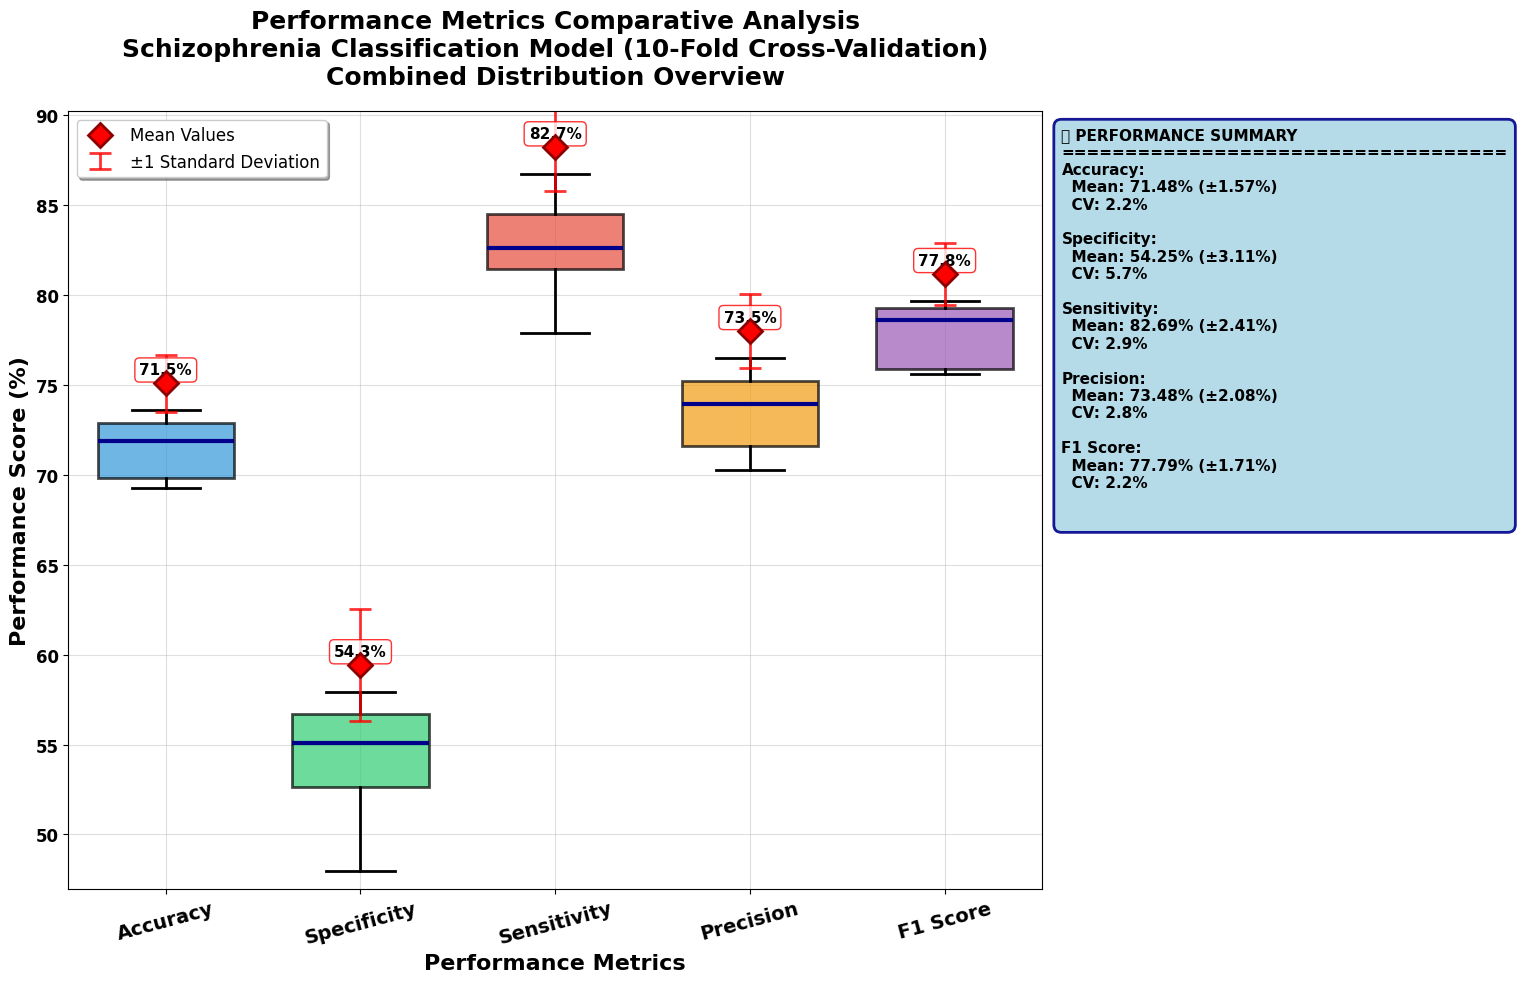

In [ ]:
# Combined Box Plot - All metrics together for comparison
plt.figure(figsize=(14, 10))

# Prepare data for combined box plot (excluding FPR for better scale)
combined_data = [acc_per_fold, specificity_per_fold, sensitivity_per_fold,
                 precision_per_fold, f1_per_fold]
combined_labels = ['Accuracy', 'Specificity', 'Sensitivity', 'Precision', 'F1 Score']

# Enhanced color palette
combined_colors = ['#3498DB', '#2ECC71', '#E74C3C', '#F39C12', '#9B59B6']

# Create combined box plot with enhanced styling
bp = plt.boxplot(combined_data, labels=combined_labels, patch_artist=True, widths=0.7,
                 boxprops=dict(linewidth=2),
                 medianprops=dict(color='darkblue', linewidth=3),
                 whiskerprops=dict(linewidth=2),
                 capprops=dict(linewidth=2),
                 flierprops=dict(marker='o', markerfacecolor='red', markersize=8, alpha=0.7))

# Color each box differently with enhanced styling
for patch, color in zip(bp['boxes'], combined_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Calculate means and stds
means = [np.mean(data) for data in combined_data]
stds = [np.std(data) for data in combined_data]

# Find the maximum value in the data to position mean markers above
max_values = [np.max(data) for data in combined_data]

# Add mean diamonds OUTSIDE/ABOVE each box plot
for i, (mean_val, std_val, max_val) in enumerate(zip(means, stds, max_values)):
    # Position mean marker above the box plot
    mean_position = max_val + 1.5  # Position above the highest point

    plt.plot(i+1, mean_position, 'D', color='red', markersize=12, markeredgecolor='darkred',
             markeredgewidth=2, label='Mean Values' if i == 0 else "", zorder=10)

    # Add text label with mean value
    plt.text(i+1, mean_position + 0.5, f'{mean_val:.1f}%',
             horizontalalignment='center', fontsize=11, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='red'))

    # Add error bars for standard deviation - also positioned above
    plt.errorbar(i+1, mean_position, yerr=std_val, fmt='none', color='red',
                 capsize=8, capthick=2, linewidth=2, alpha=0.8,
                 label='±1 Standard Deviation' if i == 0 else "")

# Adjust y-axis to reduce gaps and focus on the data range
data_min = min([np.min(data) for data in combined_data])
data_max = max([np.max(data) for data in combined_data])
mean_position_max = max([np.max(data) + 1.5 for data in combined_data])

# Set tighter y-limits to reduce empty space
y_min = data_min - 1  # Small buffer below minimum
y_max = mean_position_max + 2  # Small buffer above mean markers
plt.ylim(y_min, y_max)

# Enhanced plot styling
plt.title('Performance Metrics Comparative Analysis\nSchizophrenia Classification Model (10-Fold Cross-Validation)\nCombined Distribution Overview',
          fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Performance Score (%)', fontsize=16, fontweight='bold')
plt.xlabel('Performance Metrics', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.4, linestyle='-', linewidth=0.8)

# Enhanced axis styling
plt.xticks(fontsize=14, fontweight='bold', rotation=15)
plt.yticks(fontsize=12, fontweight='bold')

# Enhanced legend
plt.legend(loc='upper left', fontsize=12, frameon=True, fancybox=True, shadow=True)

# Enhanced statistics table - positioned OUTSIDE the plot area
stats_text = "📊 PERFORMANCE SUMMARY\n" + "="*35 + "\n"
for i, (label, data) in enumerate(zip(combined_labels, combined_data)):
    mean_val = np.mean(data)
    std_val = np.std(data)
    cv = (std_val/mean_val)*100  # Coefficient of variation
    stats_text += f"{label}:\n  Mean: {mean_val:.2f}% (±{std_val:.2f}%)\n  CV: {cv:.1f}%\n\n"

# Position the statistics box outside the plot area (to the right)
plt.text(1.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=11, fontweight='bold',
         verticalalignment='top', horizontalalignment='left',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.9,
                  edgecolor='darkblue', linewidth=2))

plt.tight_layout()
# Adjust layout to make room for external statistics box
plt.subplots_adjust(right=0.75)
plt.show()

C:\Users\Milon\AppData\Local\Temp\ipykernel_18600\1288674071.py:49: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Milon\AppData\Local\Temp\ipykernel_18600\1288674071.py:49: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\Milon\pict\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Milon\pict\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


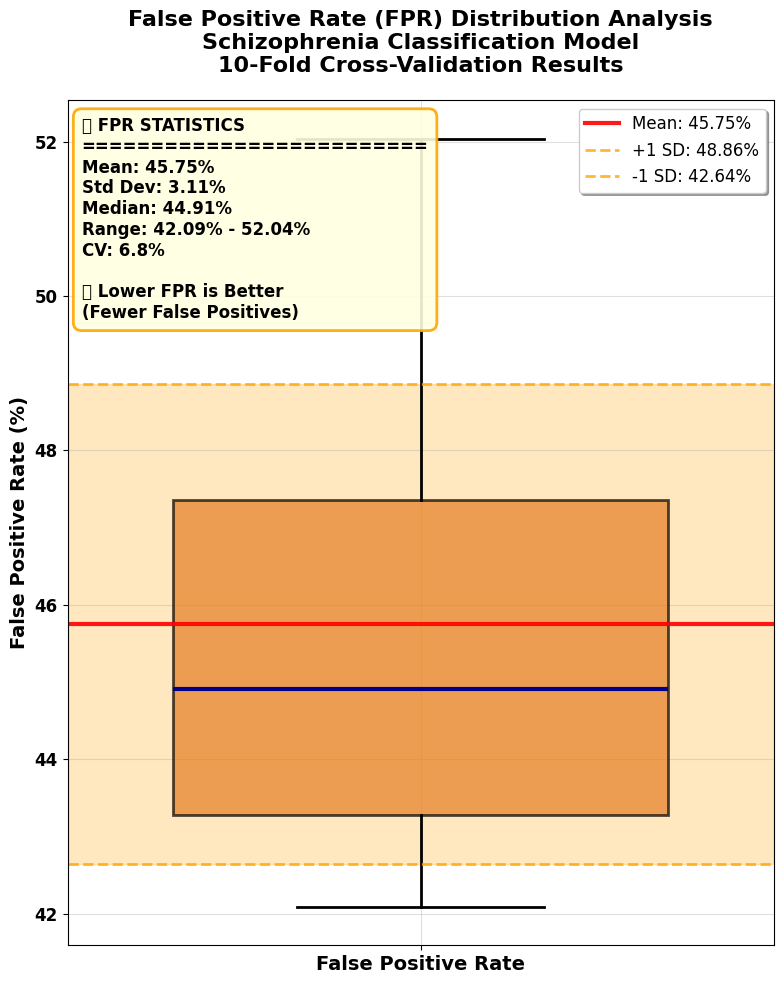

In [ ]:


# Separate FPR Box Plot (since it's an inverse metric)
plt.figure(figsize=(8, 10))

# Enhanced styling for FPR box plot
bp = plt.boxplot(fpr_per_fold, patch_artist=True, widths=0.7,
                 boxprops=dict(facecolor='#E67E22', alpha=0.7, linewidth=2),
                 medianprops=dict(color='darkblue', linewidth=3),
                 whiskerprops=dict(linewidth=2),
                 capprops=dict(linewidth=2),
                 flierprops=dict(marker='o', markerfacecolor='red', markersize=10, alpha=0.7))

# Calculate FPR statistics
fpr_mean = np.mean(fpr_per_fold)
fpr_std = np.std(fpr_per_fold)
fpr_median = np.median(fpr_per_fold)
fpr_cv = (fpr_std/fpr_mean)*100

# Add mean line with enhanced styling
plt.axhline(y=fpr_mean, color='red', linestyle='-', linewidth=3, alpha=0.9,
            label=f'Mean: {fpr_mean:.2f}%')

# Add standard deviation bands
plt.axhline(y=fpr_mean + fpr_std, color='orange', linestyle='--', linewidth=2, alpha=0.8,
            label=f'+1 SD: {fpr_mean + fpr_std:.2f}%')
plt.axhline(y=fpr_mean - fpr_std, color='orange', linestyle='--', linewidth=2, alpha=0.8,
            label=f'-1 SD: {fpr_mean - fpr_std:.2f}%')
plt.fill_between([0.5, 1.5], fpr_mean - fpr_std, fpr_mean + fpr_std, alpha=0.25, color='orange')

# Enhanced plot styling
plt.title('False Positive Rate (FPR) Distribution Analysis\nSchizophrenia Classification Model\n10-Fold Cross-Validation Results',
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('False Positive Rate (%)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.4, linestyle='-', linewidth=0.8)

# Enhanced legend
plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True)

# Enhanced statistics text box
fpr_stats_text = f'📊 FPR STATISTICS\n{"="*25}\nMean: {fpr_mean:.2f}%\nStd Dev: {fpr_std:.2f}%\nMedian: {fpr_median:.2f}%\nRange: {np.min(fpr_per_fold):.2f}% - {np.max(fpr_per_fold):.2f}%\nCV: {fpr_cv:.1f}%\n\n💡 Lower FPR is Better\n(Fewer False Positives)'
plt.text(0.02, 0.98, fpr_stats_text, transform=plt.gca().transAxes, fontsize=12, fontweight='bold',
         verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.9,
                  edgecolor='orange', linewidth=2))

# Enhanced x-axis labeling
plt.xticks([1], ['False Positive Rate'], fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Box plot analysis complete!
                       COMBINED CONFUSION MATRIX                       
Combined Confusion Matrix across all folds:
[[1631 1376]
 [ 797 3814]]

Overall Performance from Combined Matrix:
Overall Accuracy: 71.48%
Overall Specificity: 54.24%
Overall Sensitivity: 82.72%
Overall Precision: 73.49%
Overall F1 Score: 77.83%
Overall FPR: 45.76%


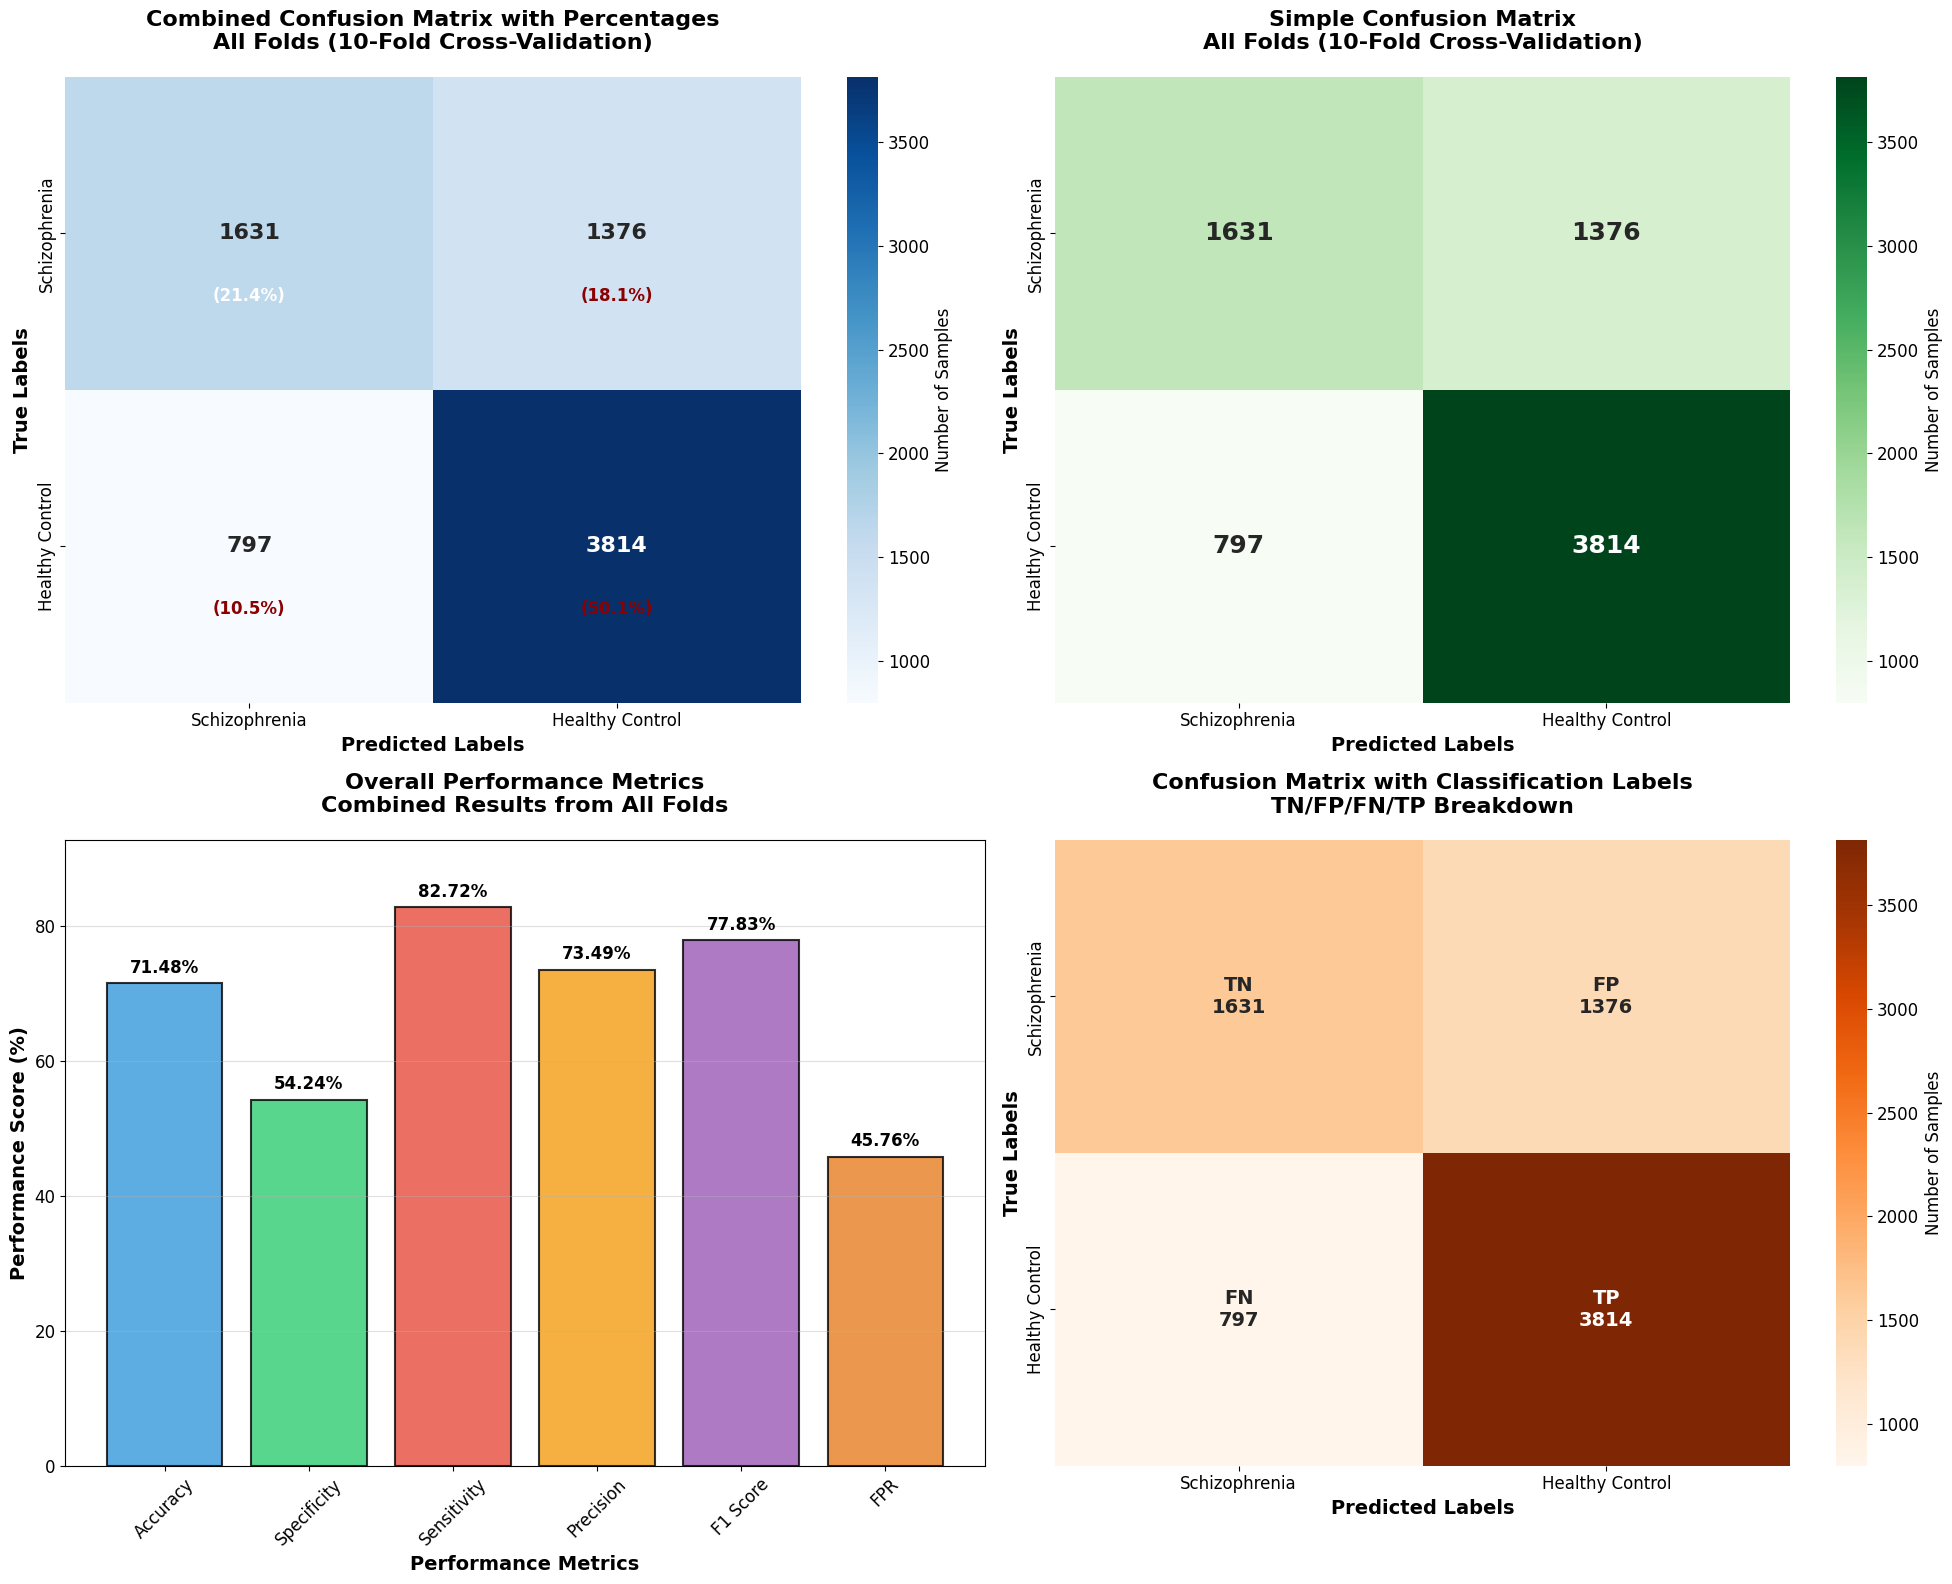


                    DETAILED CONFUSION MATRIX ANALYSIS                 

📊 SAMPLE DISTRIBUTION:
Total Samples: 7618
Schizophrenia Samples: 3007 (39.5%)
Healthy Control Samples: 4611 (60.5%)

🎯 PREDICTION RESULTS:
True Positives (TP): 3814 - Correctly identified Healthy Controls
True Negatives (TN): 1631 - Correctly identified Schizophrenia cases
False Positives (FP): 1376 - Schizophrenia cases misclassified as Healthy
False Negatives (FN): 797 - Healthy cases misclassified as Schizophrenia

📈 CLINICAL INTERPRETATION:
Sensitivity (Recall): 82.72% - Ability to correctly identify Healthy Controls
Specificity: 54.24% - Ability to correctly identify Schizophrenia cases
Precision: 73.49% - Reliability of positive predictions (Healthy)
F1 Score: 77.83% - Harmonic mean of precision and recall
False Positive Rate: 45.76% - Rate of incorrectly classifying Schizophrenia as Healthy
                           ANALYSIS COMPLETE                           


In [ ]:
print("Box plot analysis complete!")
print("="*80)

# Combined Confusion Matrix
print('========================================================================')
print('                       COMBINED CONFUSION MATRIX                       ')
print('========================================================================')

# Calculate combined confusion matrix
combined_confusion = confusion_matrix(all_y_true, all_y_pred)
print('Combined Confusion Matrix across all folds:')
print(combined_confusion)

# Calculate overall metrics from combined confusion matrix
tn_total, fp_total, fn_total, tp_total = combined_confusion.ravel()

overall_accuracy = (tp_total + tn_total) / (tp_total + tn_total + fp_total + fn_total) * 100
overall_specificity = tn_total / (tn_total + fp_total) * 100 if (tn_total + fp_total) > 0 else 0
overall_sensitivity = tp_total / (tp_total + fn_total) * 100 if (tp_total + fn_total) > 0 else 0
overall_precision = tp_total / (tp_total + fp_total) * 100 if (tp_total + fp_total) > 0 else 0
overall_f1 = 2 * (overall_precision/100 * overall_sensitivity/100) / (overall_precision/100 + overall_sensitivity/100) * 100 if (overall_precision + overall_sensitivity) > 0 else 0
overall_fpr = fp_total / (fp_total + tn_total) * 100 if (fp_total + tn_total) > 0 else 0

print('\nOverall Performance from Combined Matrix:')
print(f'Overall Accuracy: {overall_accuracy:.2f}%')
print(f'Overall Specificity: {overall_specificity:.2f}%')
print(f'Overall Sensitivity: {overall_sensitivity:.2f}%')
print(f'Overall Precision: {overall_precision:.2f}%')
print(f'Overall F1 Score: {overall_f1:.2f}%')
print(f'Overall FPR: {overall_fpr:.2f}%')

# Enhanced Combined Confusion Matrix Visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Top Left: Confusion Matrix Heatmap with Percentages
sns.heatmap(combined_confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Schizophrenia', 'Healthy Control'],
            yticklabels=['Schizophrenia', 'Healthy Control'],
            ax=axes[0,0], cbar_kws={'label': 'Number of Samples'},
            annot_kws={'size': 16, 'weight': 'bold'})

axes[0,0].set_title('Combined Confusion Matrix with Percentages\nAll Folds (10-Fold Cross-Validation)',
                    fontsize=16, fontweight='bold', pad=20)
axes[0,0].set_xlabel('Predicted Labels', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('True Labels', fontsize=14, fontweight='bold')
axes[0,0].tick_params(labelsize=12)

# Add percentage annotations with better color visibility
total_samples = np.sum(combined_confusion)
for i in range(2):
    for j in range(2):
        percentage = (combined_confusion[i, j] / total_samples) * 100
        # Use white color for the TN cell (top-left, dark blue) and dark color for others
        text_color = 'white' if (i == 0 and j == 0) else 'darkred'
        axes[0,0].text(j + 0.5, i + 0.7, f'({percentage:.1f}%)',
                       ha='center', va='center', fontsize=12, fontweight='bold', color=text_color)

# Top Right: Simple Confusion Matrix without Percentages
sns.heatmap(combined_confusion, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Schizophrenia', 'Healthy Control'],
            yticklabels=['Schizophrenia', 'Healthy Control'],
            ax=axes[0,1], cbar_kws={'label': 'Number of Samples'},
            annot_kws={'size': 18, 'weight': 'bold'})

axes[0,1].set_title('Simple Confusion Matrix\nAll Folds (10-Fold Cross-Validation)',
                    fontsize=16, fontweight='bold', pad=20)
axes[0,1].set_xlabel('Predicted Labels', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('True Labels', fontsize=14, fontweight='bold')
axes[0,1].tick_params(labelsize=12)

# Bottom Left: Performance Metrics Bar Chart
metrics_names_final = ['Accuracy', 'Specificity', 'Sensitivity', 'Precision', 'F1 Score', 'FPR']
overall_values = [overall_accuracy, overall_specificity, overall_sensitivity,
                  overall_precision, overall_f1, overall_fpr]
bar_colors = ['#3498DB', '#2ECC71', '#E74C3C', '#F39C12', '#9B59B6', '#E67E22']

bars = axes[1,0].bar(metrics_names_final, overall_values, color=bar_colors, alpha=0.8,
                     edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar, value in zip(bars, overall_values):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{value:.2f}%', ha='center', va='bottom',
                   fontsize=12, fontweight='bold')

axes[1,0].set_title('Overall Performance Metrics\nCombined Results from All Folds',
                    fontsize=16, fontweight='bold', pad=20)
axes[1,0].set_ylabel('Performance Score (%)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Performance Metrics', fontsize=14, fontweight='bold')
axes[1,0].grid(True, alpha=0.4, axis='y')
axes[1,0].set_ylim(0, max(overall_values) + 10)

# Rotate x-axis labels for better readability
axes[1,0].tick_params(axis='x', labelsize=12, labelrotation=45)
axes[1,0].tick_params(axis='y', labelsize=12)

# Bottom Right: Confusion Matrix with Classification Labels
# Create a custom annotation with both counts and labels
confusion_labels = np.array([['TN\n' + str(combined_confusion[0,0]), 'FP\n' + str(combined_confusion[0,1])],
                            ['FN\n' + str(combined_confusion[1,0]), 'TP\n' + str(combined_confusion[1,1])]])

sns.heatmap(combined_confusion, annot=confusion_labels, fmt='', cmap="Oranges",
            xticklabels=['Schizophrenia', 'Healthy Control'],
            yticklabels=['Schizophrenia', 'Healthy Control'],
            ax=axes[1,1], cbar_kws={'label': 'Number of Samples'},
            annot_kws={'size': 14, 'weight': 'bold'})

axes[1,1].set_title('Confusion Matrix with Classification Labels\nTN/FP/FN/TP Breakdown',
                    fontsize=16, fontweight='bold', pad=20)
axes[1,1].set_xlabel('Predicted Labels', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('True Labels', fontsize=14, fontweight='bold')
axes[1,1].tick_params(labelsize=12)

plt.tight_layout()
plt.show()

# Additional detailed confusion matrix analysis
print('\n' + '='*80)
print('                    DETAILED CONFUSION MATRIX ANALYSIS                 ')
print('='*80)

# Classification metrics breakdown
print(f'\n📊 SAMPLE DISTRIBUTION:')
print(f'Total Samples: {total_samples}')
print(f'Schizophrenia Samples: {combined_confusion[0,0] + combined_confusion[0,1]} ({((combined_confusion[0,0] + combined_confusion[0,1])/total_samples)*100:.1f}%)')
print(f'Healthy Control Samples: {combined_confusion[1,0] + combined_confusion[1,1]} ({((combined_confusion[1,0] + combined_confusion[1,1])/total_samples)*100:.1f}%)')

print(f'\n🎯 PREDICTION RESULTS:')
print(f'True Positives (TP): {tp_total} - Correctly identified Healthy Controls')
print(f'True Negatives (TN): {tn_total} - Correctly identified Schizophrenia cases')
print(f'False Positives (FP): {fp_total} - Schizophrenia cases misclassified as Healthy')
print(f'False Negatives (FN): {fn_total} - Healthy cases misclassified as Schizophrenia')

print(f'\n📈 CLINICAL INTERPRETATION:')
print(f'Sensitivity (Recall): {overall_sensitivity:.2f}% - Ability to correctly identify Healthy Controls')
print(f'Specificity: {overall_specificity:.2f}% - Ability to correctly identify Schizophrenia cases')
print(f'Precision: {overall_precision:.2f}% - Reliability of positive predictions (Healthy)')
print(f'F1 Score: {overall_f1:.2f}% - Harmonic mean of precision and recall')
print(f'False Positive Rate: {overall_fpr:.2f}% - Rate of incorrectly classifying Schizophrenia as Healthy')

print('========================================================================')
print('                           ANALYSIS COMPLETE                           ')
print('========================================================================')

Box plot analysis complete!
                       COMBINED CONFUSION MATRIX                       
Combined Confusion Matrix across all folds:
[[1631 1376]
 [ 797 3814]]

Overall Performance from Combined Matrix:
Overall Accuracy: 71.48%
Overall Specificity: 54.24%
Overall Sensitivity: 82.72%
Overall Precision: 73.49%
Overall F1 Score: 77.83%
Overall FPR: 45.76%


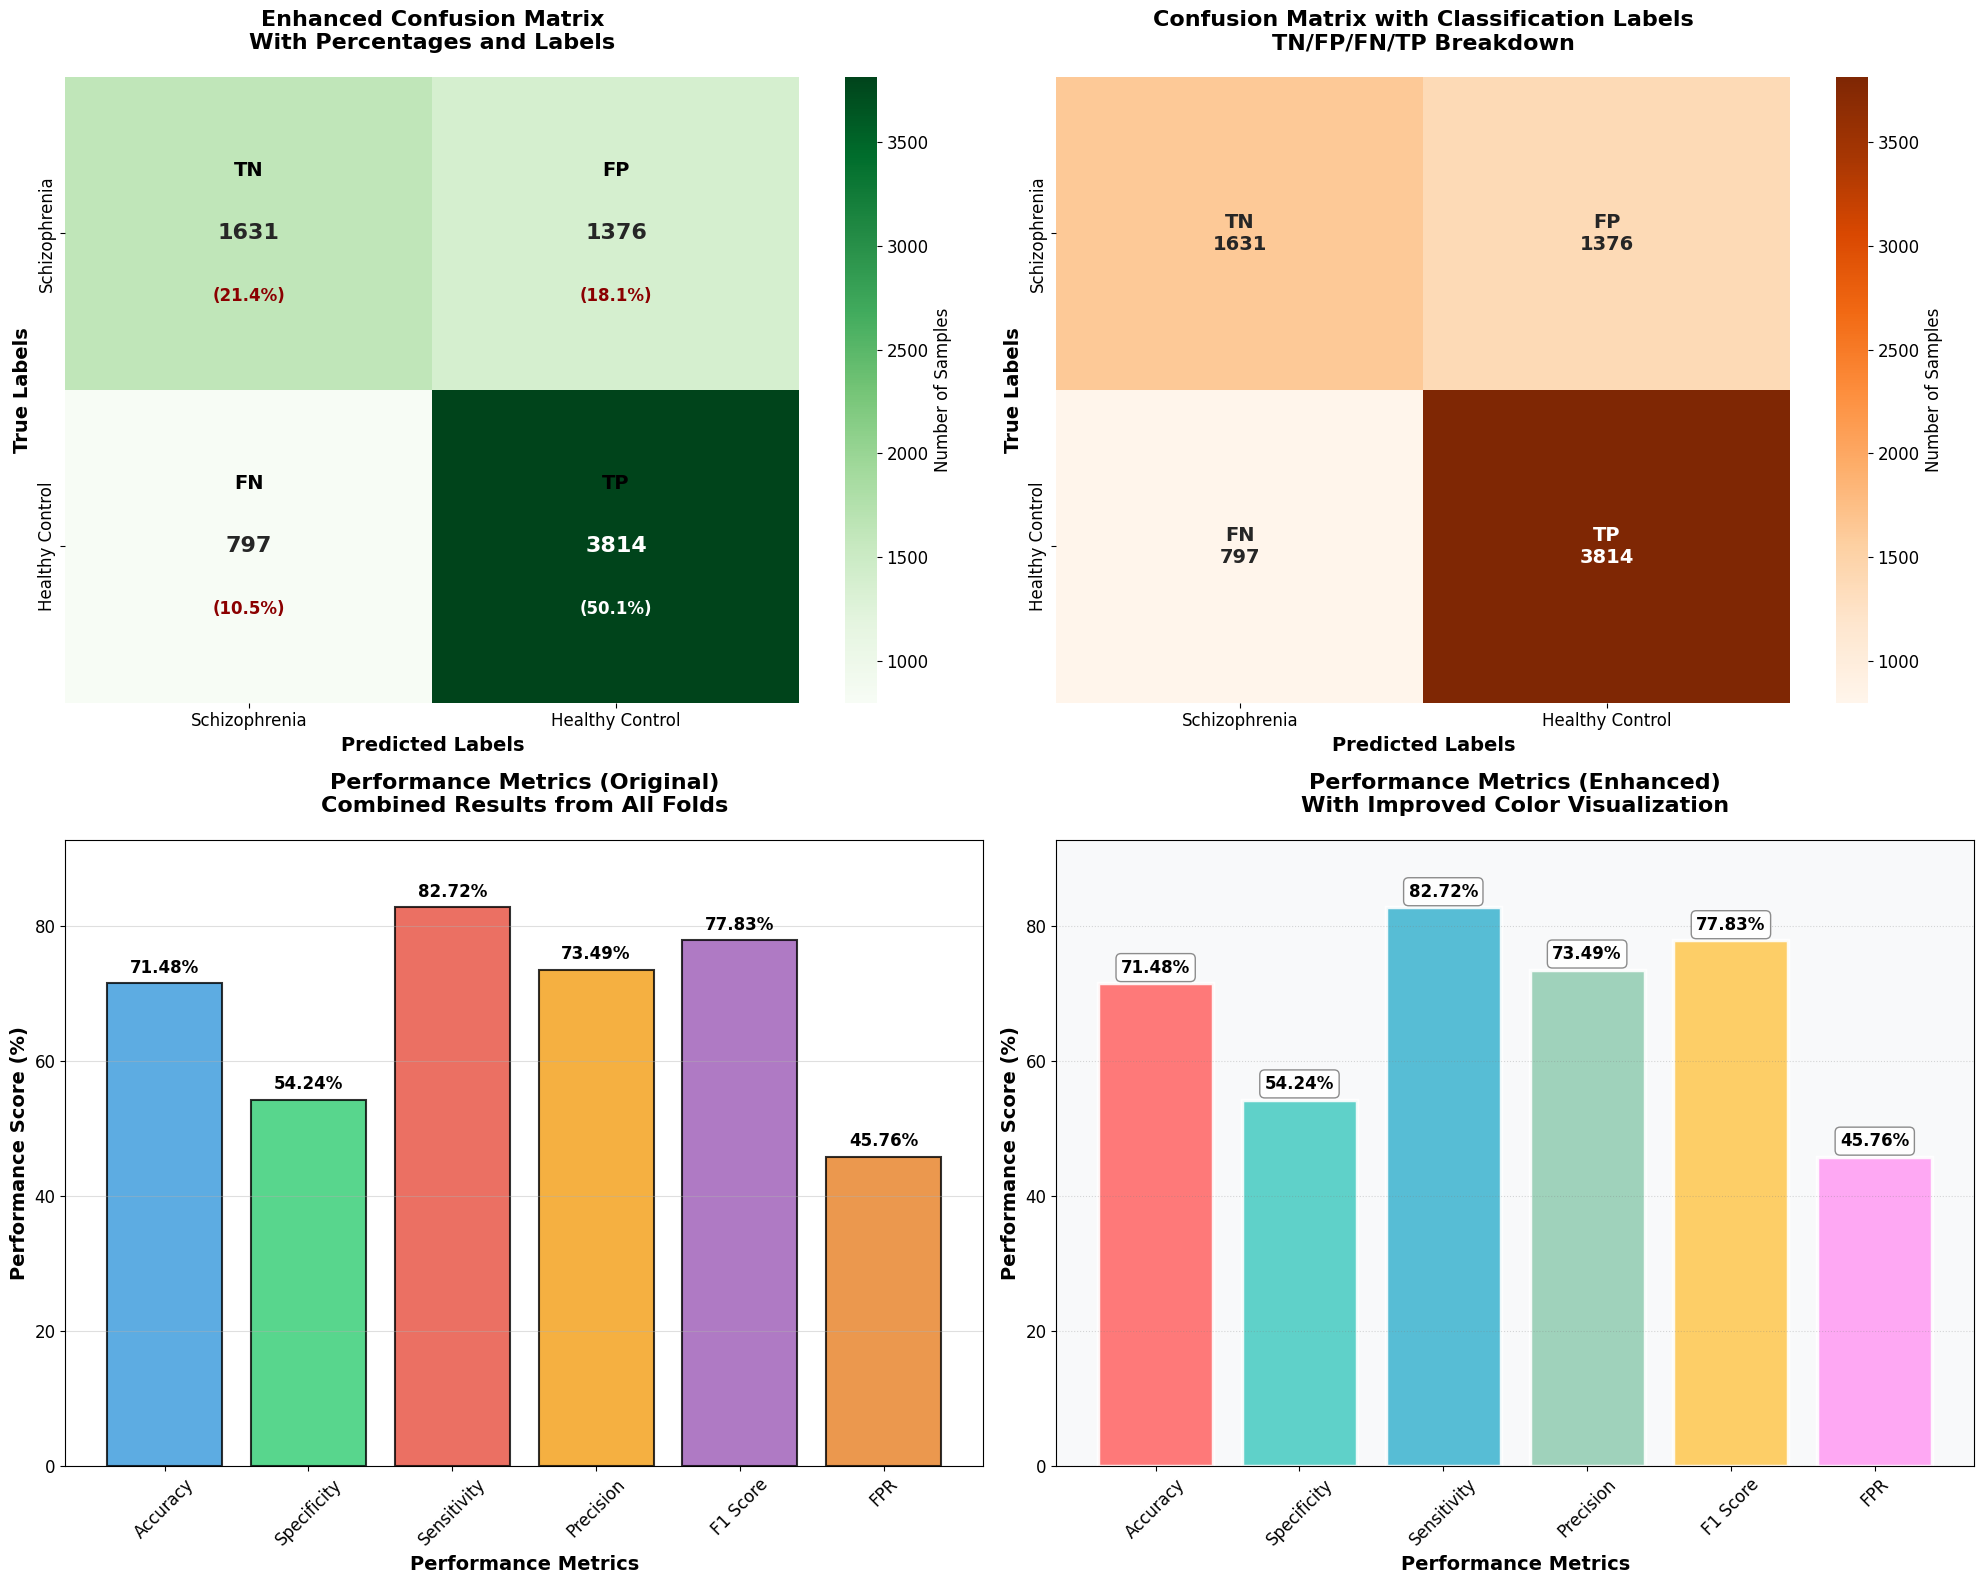


                    DETAILED CONFUSION MATRIX ANALYSIS                 

📊 SAMPLE DISTRIBUTION:
Total Samples: 7618
Schizophrenia Samples: 3007 (39.5%)
Healthy Control Samples: 4611 (60.5%)

🎯 PREDICTION RESULTS:
True Positives (TP): 3814 - Correctly identified Healthy Controls
True Negatives (TN): 1631 - Correctly identified Schizophrenia cases
False Positives (FP): 1376 - Schizophrenia cases misclassified as Healthy
False Negatives (FN): 797 - Healthy cases misclassified as Schizophrenia

📈 CLINICAL INTERPRETATION:
Sensitivity (Recall): 82.72% - Ability to correctly identify Healthy Controls
Specificity: 54.24% - Ability to correctly identify Schizophrenia cases
Precision: 73.49% - Reliability of positive predictions (Healthy)
F1 Score: 77.83% - Harmonic mean of precision and recall
False Positive Rate: 45.76% - Rate of incorrectly classifying Schizophrenia as Healthy
                           ANALYSIS COMPLETE                           


In [ ]:
print("Box plot analysis complete!")
print("="*80)

# Combined Confusion Matrix
print('========================================================================')
print('                       COMBINED CONFUSION MATRIX                       ')
print('========================================================================')

# Calculate combined confusion matrix
combined_confusion = confusion_matrix(all_y_true, all_y_pred)
print('Combined Confusion Matrix across all folds:')
print(combined_confusion)

# Calculate overall metrics from combined confusion matrix
tn_total, fp_total, fn_total, tp_total = combined_confusion.ravel()

overall_accuracy = (tp_total + tn_total) / (tp_total + tn_total + fp_total + fn_total) * 100
overall_specificity = tn_total / (tn_total + fp_total) * 100 if (tn_total + fp_total) > 0 else 0
overall_sensitivity = tp_total / (tp_total + fn_total) * 100 if (tp_total + fn_total) > 0 else 0
overall_precision = tp_total / (tp_total + fp_total) * 100 if (tp_total + fp_total) > 0 else 0
overall_f1 = 2 * (overall_precision/100 * overall_sensitivity/100) / (overall_precision/100 + overall_sensitivity/100) * 100 if (overall_precision + overall_sensitivity) > 0 else 0
overall_fpr = fp_total / (fp_total + tn_total) * 100 if (fp_total + tn_total) > 0 else 0

print('\nOverall Performance from Combined Matrix:')
print(f'Overall Accuracy: {overall_accuracy:.2f}%')
print(f'Overall Specificity: {overall_specificity:.2f}%')
print(f'Overall Sensitivity: {overall_sensitivity:.2f}%')
print(f'Overall Precision: {overall_precision:.2f}%')
print(f'Overall F1 Score: {overall_f1:.2f}%')
print(f'Overall FPR: {overall_fpr:.2f}%')

# Enhanced Combined Confusion Matrix Visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Top Left: Enhanced Confusion Matrix with Percentages and Labels
sns.heatmap(combined_confusion, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Schizophrenia', 'Healthy Control'],
            yticklabels=['Schizophrenia', 'Healthy Control'],
            ax=axes[0,0], cbar_kws={'label': 'Number of Samples'},
            annot_kws={'size': 16, 'weight': 'bold'})

axes[0,0].set_title('Enhanced Confusion Matrix\nWith Percentages and Labels',
                    fontsize=16, fontweight='bold', pad=20)
axes[0,0].set_xlabel('Predicted Labels', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('True Labels', fontsize=14, fontweight='bold')
axes[0,0].tick_params(labelsize=12)

# Add both percentages and TN/FP/FN/TP labels
total_samples = np.sum(combined_confusion)
labels_map = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        percentage = (combined_confusion[i, j] / total_samples) * 100
        # Add TN/FP/FN/TP label
        axes[0,0].text(j + 0.5, i + 0.3, labels_map[i][j],
                       ha='center', va='center', fontsize=14, fontweight='bold', color='black')
        # Add percentage with better visibility - use white for darker green cells
        percentage_color = 'white' if (i == 1 and j == 1) else 'darkred'
        axes[0,0].text(j + 0.5, i + 0.7, f'({percentage:.1f}%)',
                       ha='center', va='center', fontsize=12, fontweight='bold', color=percentage_color)

# Top Right: Confusion Matrix with Classification Labels
# Create a custom annotation with both counts and labels
confusion_labels = np.array([['TN\n' + str(combined_confusion[0,0]), 'FP\n' + str(combined_confusion[0,1])],
                            ['FN\n' + str(combined_confusion[1,0]), 'TP\n' + str(combined_confusion[1,1])]])

sns.heatmap(combined_confusion, annot=confusion_labels, fmt='', cmap="Oranges",
            xticklabels=['Schizophrenia', 'Healthy Control'],
            yticklabels=['Schizophrenia', 'Healthy Control'],
            ax=axes[0,1], cbar_kws={'label': 'Number of Samples'},
            annot_kws={'size': 14, 'weight': 'bold'})

axes[0,1].set_title('Confusion Matrix with Classification Labels\nTN/FP/FN/TP Breakdown',
                    fontsize=16, fontweight='bold', pad=20)
axes[0,1].set_xlabel('Predicted Labels', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('True Labels', fontsize=14, fontweight='bold')
axes[0,1].tick_params(labelsize=12)

# Bottom Left: Original Performance Metrics Bar Chart
metrics_names_final = ['Accuracy', 'Specificity', 'Sensitivity', 'Precision', 'F1 Score', 'FPR']
overall_values = [overall_accuracy, overall_specificity, overall_sensitivity,
                  overall_precision, overall_f1, overall_fpr]
bar_colors = ['#3498DB', '#2ECC71', '#E74C3C', '#F39C12', '#9B59B6', '#E67E22']

bars = axes[1,0].bar(metrics_names_final, overall_values, color=bar_colors, alpha=0.8,
                     edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar, value in zip(bars, overall_values):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{value:.2f}%', ha='center', va='bottom',
                   fontsize=12, fontweight='bold')

axes[1,0].set_title('Performance Metrics (Original)\nCombined Results from All Folds',
                    fontsize=16, fontweight='bold', pad=20)
axes[1,0].set_ylabel('Performance Score (%)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Performance Metrics', fontsize=14, fontweight='bold')
axes[1,0].grid(True, alpha=0.4, axis='y')
axes[1,0].set_ylim(0, max(overall_values) + 10)

# Rotate x-axis labels for better readability
axes[1,0].tick_params(axis='x', labelsize=12, labelrotation=45)
axes[1,0].tick_params(axis='y', labelsize=12)

# Bottom Right: Enhanced Performance Metrics with Better Colors
import matplotlib.colors as mcolors
# Enhanced gradient color palette
enhanced_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3']

bars2 = axes[1,1].bar(metrics_names_final, overall_values, color=enhanced_colors, alpha=0.9,
                      edgecolor='white', linewidth=2.5)

# Add value labels with contrasting background
for bar, value in zip(bars2, overall_values):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{value:.2f}%', ha='center', va='bottom',
                   fontsize=12, fontweight='bold', color='black',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9, edgecolor='gray'))

axes[1,1].set_title('Performance Metrics (Enhanced)\nWith Improved Color Visualization',
                    fontsize=16, fontweight='bold', pad=20)
axes[1,1].set_ylabel('Performance Score (%)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Performance Metrics', fontsize=14, fontweight='bold')
axes[1,1].grid(True, alpha=0.3, axis='y', linestyle=':', color='gray')
axes[1,1].set_ylim(0, max(overall_values) + 10)
axes[1,1].tick_params(axis='x', labelsize=12, labelrotation=45)
axes[1,1].tick_params(axis='y', labelsize=12)

# Add subtle background gradient
axes[1,1].set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

# Additional detailed confusion matrix analysis
print('\n' + '='*80)
print('                    DETAILED CONFUSION MATRIX ANALYSIS                 ')
print('='*80)

# Classification metrics breakdown
print(f'\n📊 SAMPLE DISTRIBUTION:')
print(f'Total Samples: {total_samples}')
print(f'Schizophrenia Samples: {combined_confusion[0,0] + combined_confusion[0,1]} ({((combined_confusion[0,0] + combined_confusion[0,1])/total_samples)*100:.1f}%)')
print(f'Healthy Control Samples: {combined_confusion[1,0] + combined_confusion[1,1]} ({((combined_confusion[1,0] + combined_confusion[1,1])/total_samples)*100:.1f}%)')

print(f'\n🎯 PREDICTION RESULTS:')
print(f'True Positives (TP): {tp_total} - Correctly identified Healthy Controls')
print(f'True Negatives (TN): {tn_total} - Correctly identified Schizophrenia cases')
print(f'False Positives (FP): {fp_total} - Schizophrenia cases misclassified as Healthy')
print(f'False Negatives (FN): {fn_total} - Healthy cases misclassified as Schizophrenia')

print(f'\n📈 CLINICAL INTERPRETATION:')
print(f'Sensitivity (Recall): {overall_sensitivity:.2f}% - Ability to correctly identify Healthy Controls')
print(f'Specificity: {overall_specificity:.2f}% - Ability to correctly identify Schizophrenia cases')
print(f'Precision: {overall_precision:.2f}% - Reliability of positive predictions (Healthy)')
print(f'F1 Score: {overall_f1:.2f}% - Harmonic mean of precision and recall')
print(f'False Positive Rate: {overall_fpr:.2f}% - Rate of incorrectly classifying Schizophrenia as Healthy')

print('========================================================================')
print('                           ANALYSIS COMPLETE                           ')
print('========================================================================')